In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.utils import shuffle
from sklearn import set_config, metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, ShuffleSplit, LeaveOneGroupOut, GroupKFold, StratifiedGroupKFold, KFold
import random
from collections import Counter
import joblib
import re
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


In [3]:
sns.set_context("talk")
sns.set_theme(style='white')
sns.set_palette('bright', 2)

### GET DFs - ALL, CHRONO, CHAR, LOC, FAC, VEH, GPE, TIME, PATIENT, AGENT, ADJ 

#### DF_ALL

In [4]:
df_ALL = pd.read_csv(r'data_doc2vec/ALL_embeddings.csv')
df_ALL.set_index("doc", inplace = True)
df_ALL = df_ALL.replace(np.nan, 0)

In [5]:
df_ALL.shape

(2944, 300)

#### DF_CHRONO

In [6]:
df_CHRONO = pd.read_csv(r'data_doc2vec/CHRONO_embeddings.csv')
df_CHRONO.set_index("doc", inplace = True)
df_CHRONO = df_CHRONO.replace(np.nan, 0)
df_CHRONO.shape

(2944, 300)

In [7]:
df_CHAR = pd.read_csv(r'data_doc2vec/CHAR_embeddings.csv')
df_CHAR.set_index("doc", inplace = True)
df_CHAR = df_CHAR.replace(np.nan, 0)
df_CHAR.shape

(2944, 300)

In [8]:
df_AGENT = pd.read_csv(r'data_doc2vec/AGENT_embeddings.csv')
df_AGENT.set_index("doc", inplace = True)
df_AGENT = df_AGENT.replace(np.nan, 0)
df_AGENT.shape

(2944, 300)

In [9]:
df_PATIENT = pd.read_csv(r'data_doc2vec/PATIENT_embeddings.csv')
df_PATIENT.set_index("doc", inplace = True)
df_PATIENT = df_PATIENT.replace(np.nan, 0)
df_PATIENT.shape

(2944, 300)

In [10]:
df_ADJ = pd.read_csv(r'data_doc2vec/ADJ_embeddings.csv')
df_ADJ.set_index("doc", inplace = True)
df_ADJ = df_ADJ.replace(np.nan, 0)
df_ADJ.shape

(2944, 300)

In [11]:
df_LOC = pd.read_csv(r'data_doc2vec/LOC_embeddings.csv')
df_LOC.set_index("doc", inplace = True)
df_LOC = df_LOC.replace(np.nan, 0)
df_LOC.shape

(2944, 300)

In [12]:
df_FAC = pd.read_csv(r'data_doc2vec/FAC_embeddings.csv')
df_FAC.set_index("doc", inplace = True)
df_FAC = df_FAC.replace(np.nan, 0)
df_FAC.shape

(2944, 300)

In [13]:
df_GPE = pd.read_csv(r'data_doc2vec/GPE_embeddings.csv')
df_GPE.set_index("doc", inplace = True)
df_GPE = df_GPE.replace(np.nan, 0)
df_GPE.shape

(2944, 300)

In [14]:
df_VEH = pd.read_csv(r'data_doc2vec/VEH_embeddings.csv')
df_VEH.set_index("doc", inplace = True)
df_VEH = df_VEH.replace(np.nan, 0)
df_VEH.shape

(2944, 300)

In [15]:
df_TIME = pd.read_csv(r'data_doc2vec/TIME_embeddings.csv')
df_TIME.set_index("doc", inplace = True)
df_TIME = df_TIME.replace(np.nan, 0)
df_TIME.shape

(2944, 300)

### GET DF_BoW

In [16]:
df_BoW = pd.read_csv(r'/home/crazyjeannot/Documents/master/M2/master_thesis/data/main_dataset_majed_canon_author_scale.csv')
df_BoW.set_index("index", inplace = True)
df_BoW = df_BoW.replace(np.nan, 0)

In [17]:
df_BoW = df_BoW.iloc[:, 200:800]#1000

In [18]:
df_BoW.shape

(2960, 600)

### DF MAIN : ALL CONCATENATED DFs

In [19]:
def get_common_items(list1, list2):
    # Find the intersection of all four lists
    common_items = list(set(list1) & set(list2))
    all_items = set([*list1, *list2])

    faulty_items = [elem for elem in all_items if elem not in common_items]
    
    return common_items, faulty_items, all_items


In [20]:
common_items, faulty_items, all_items = get_common_items(df_ALL.index, df_BoW.index)

In [21]:
print(len(common_items), len(faulty_items), len(all_items))

2943 18 2961


In [22]:
print(df_ALL.shape, df_BoW.shape)

(2944, 300) (2960, 600)


In [23]:
df_ALL.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_CHAR.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_CHRONO.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_AGENT.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_PATIENT.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_ADJ.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_LOC.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_FAC.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_GPE.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_VEH.drop(faulty_items, axis=0, inplace=True, errors='ignore')
df_TIME.drop(faulty_items, axis=0, inplace=True, errors='ignore')

df_BoW.drop(faulty_items, axis=0, inplace=True, errors='ignore')

In [24]:
df_CHRONOCHAR_CONCAT = pd.concat([df_CHRONO, df_CHAR], axis=1)

In [25]:
df_MAIN_CONCAT = pd.concat([df_AGENT, df_PATIENT, df_ADJ, df_LOC, df_FAC, df_GPE, df_VEH, df_TIME], axis=1)

## GET GENRES

In [26]:
df_corpus = pd.read_csv(r'/home/crazyjeannot/Documents/master/M2/master_thesis/meta_data/corpus.csv')
df_corpus.set_index(['doc_name'], inplace=True)

In [27]:
genres_ok = ["roman d'aventures",
'policier',
'littérature jeunesse',
'mémoires et autobiographie',
'roman sentimental']
#'roman historique',

In [28]:
def get_df_with_subgenre(df, df_corpus, genres_ok):
    df_res = df.copy()
    list_subgenre = []
    for elem in list(df_res.index):
        if elem in list(df_corpus.index):
            if df_corpus.loc[elem].genre in genres_ok:
                list_subgenre.append(df_corpus.loc[elem].genre)
            else:
                list_subgenre.append('')
        else:
            list_subgenre.append('')
    df_res['subgenre'] = list_subgenre

    return df_res[df_res['subgenre'] != '']

In [29]:
df_ALL_genred = get_df_with_subgenre(df_ALL, df_corpus, genres_ok)
df_CHRONOCHAR_CONCAT_genred = get_df_with_subgenre(df_CHRONOCHAR_CONCAT, df_corpus, genres_ok)
df_MAIN_CONCAT_genred = get_df_with_subgenre(df_MAIN_CONCAT, df_corpus, genres_ok)
df_BOW_genred = get_df_with_subgenre(df_BoW, df_corpus, genres_ok)

In [30]:
df_ALL_genred.subgenre.value_counts()

subgenre
roman d'aventures             363
policier                      306
littérature jeunesse          145
mémoires et autobiographie    136
roman sentimental             133
Name: count, dtype: int64

### GET AUTHORS

In [31]:
def get_df_with_authors(df):
    df_res = df.copy()
    list_author = []
    for elem in df_res.index:
        list_author.append(elem.split('_')[1])
    df_res['auteur'] = list_author

    return df_res

In [32]:
df_ALL_authored = get_df_with_authors(df_ALL_genred)
df_CHRONOCHAR_CONCAT_authored = get_df_with_authors(df_CHRONOCHAR_CONCAT_genred)
df_MAIN_CONCAT_authored = get_df_with_authors(df_MAIN_CONCAT_genred)
df_BOW_authored = get_df_with_authors(df_BOW_genred)

In [33]:
def balance_dataframe(df, subgenre_column, N):
    # Count the occurrences of each subgenre
    subgenre_counts = df[subgenre_column].value_counts()
    
    # Determine the minimum count among all subgenres
    min_count = N
    
    # Create an empty DataFrame to store the balanced samples
    balanced_df = pd.DataFrame()
    
    # Iterate over each subgenre
    for i, subgenre in enumerate(subgenre_counts.index):
        # Sample `min_count` number of rows for each subgenre
        sampled_rows = df[df[subgenre_column] == subgenre].sample(n=min(min_count, subgenre_counts.values[i]), random_state=42)
        
        # Append the sampled rows to the balanced DataFrame
        balanced_df = pd.concat([balanced_df, sampled_rows])
    
    return shuffle(balanced_df)

In [34]:
df_ALL_balanced = balance_dataframe(df_ALL_authored, 'subgenre', 130)
df_CHRONOCHAR_CONCAT_balanced = balance_dataframe(df_CHRONOCHAR_CONCAT_authored, 'subgenre', 130)
df_MAIN_CONCAT_balanced = balance_dataframe(df_MAIN_CONCAT_authored, 'subgenre', 130)
df_BOW_balanced = balance_dataframe(df_BOW_authored, 'subgenre', 130)

In [35]:
df_ALL_balanced.subgenre.value_counts()

subgenre
mémoires et autobiographie    130
roman d'aventures             130
roman sentimental             130
policier                      130
littérature jeunesse          130
Name: count, dtype: int64

### SVM PIPELINE

In [36]:
def plot_coefficients(coefs, feature_names, current_class, top_features=15):
    top_positive_coefficients = np.argsort(coefs)[-top_features:]
    top_negative_coefficients = np.argsort(coefs)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    fig, ax = plt.subplots(figsize=(15, 5))

    colors = [current_class[1] if c < 0 else current_class[0] for c in coefs[top_coefficients]]
    feature_names = np.array(feature_names)
    zipped = list(zip(feature_names, coefs[top_coefficients], colors))
    df_tmp = pd.DataFrame(zipped, columns=['features', 'coefs', 'colors'])
    sns.barplot(data=df_tmp, x='features', y='coefs', color=colors, ax=ax, hue='colors', palette=sns.color_palette())

    ax.set_xlabel('Feature name', fontsize = 30)
    ax.set_ylabel('Coefficient score', fontsize = 30)
    
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.savefig('img/COEFS_'+current_class[1]+'_vs_'+current_class[0]+'_GFK.png', format='png', bbox_inches='tight', dpi=300)

    plt.show()
    

In [37]:
def GKF_canonized(df_main, name_features, n_splits=5, probas=False, kernel='rbf', get_coefs=False):
    
    ALL_PREDS, ALL_GT = [], [] # lists of all predictions & all ground truth data
    ALL_INDEX = [] # lists of all test probas and all test index
    ALL_PROBA_AVENTURES, ALL_PROBA_JEUNESSE, ALL_PROBA_POLICIER, ALL_PROBA_AUTOBIO, ALL_PROBA_SENTIMENT = [], [], [], [], []    
    
    pipe = make_pipeline(StandardScaler(), SVC(kernel=kernel, probability=probas))
    gkf = GroupKFold(n_splits)
    
    for (train_index, test_index) in gkf.split(df_main.drop(['auteur', 'subgenre'], axis=1), df_main['subgenre'], df_main['auteur']): 
            train = df_main.iloc[train_index]
            test = df_main.iloc[test_index]

            X_train = train.drop(['auteur', 'subgenre'], axis=1)
            y_train = train['subgenre']
            X_test = test.drop(['auteur', 'subgenre'], axis=1)
            y_test = test['subgenre']
        
            pipe.fit(X_train, y_train) 
            preds = pipe.predict(X_test)
            
            ALL_PREDS.extend(preds)
            ALL_GT.extend(y_test)
            ALL_INDEX.extend(X_test.index)
                        
            if probas==True:
                probs = pipe.predict_proba(X_test)
                ALL_PROBA_JEUNESSE.extend(probs[:,0])
                ALL_PROBA_AUTOBIO.extend(probs[:,1])
                ALL_PROBA_POLICIER.extend(probs[:,2])
                ALL_PROBA_AVENTURES.extend(probs[:,3])
                ALL_PROBA_SENTIMENT.extend(probs[:,4])
        
    cm = ConfusionMatrixDisplay.from_predictions(ALL_GT, ALL_PREDS)
    plt.tight_layout()

    # get translated labels for CM png
    ax = cm.ax_
    translated_genres = ['Children', 'Memoirs', 'Detective', 'Adventure', 'Romance']
    ax.set_xticklabels(translated_genres, rotation="vertical", fontsize = 15)
    ax.set_yticklabels(translated_genres, fontsize = 15)

    cm.figure_.savefig('img/CM_'+name_features+'_GKF.png', dpi=300)

    

    bas = balanced_accuracy_score(ALL_GT, ALL_PREDS)
    report = metrics.classification_report(ALL_GT, ALL_PREDS, output_dict=True)
    df_scores = pd.DataFrame(report).transpose().drop(['macro avg', 'weighted avg']).round(3)
    print(df_scores)
    print(df_scores.to_latex())
    print(bas)
     
    if get_coefs:
        if kernel != "linear":
            print(".......... COEFS ARE ONLY IMPLEMENTED FOR linearSVC ........")

        else:
            if len(pipe.classes_) == 2:
                pd.DataFrame(pipe.named_steps['svc'].coef_,
                                 index=[pipe.classes_[0]],
                                 columns=X_train.columns+['subgenre']).to_csv("coefficients_1V1_"+name_features+".csv")

                plot_coefficients(pipe.named_steps['svc'].coef_[0], X_train.columns, pipe.classes_[0] + " versus " + pipe.classes_[1])

            else:
                combinations_list = [(genre1, genre2) for genre1, genre2 in combinations(translated_genres, 2)]
                df_coefs = pd.DataFrame(pipe.named_steps['svc'].coef_, columns=X_train.columns)
                df_coefs.to_csv("output_svm/coefficients_subgenres_"+name_features+".csv")

                for i in range(int(len(pipe.classes_)*(len(pipe.classes_)-1)/2)):
                    plot_coefficients(pipe.named_steps['svc'].coef_[i], X_train.columns, combinations_list[i])#pipe.classes_[i]
            
    if probas:
        
        df_results = pd.DataFrame()
        
        df_results['metadata'] = ALL_GT
        df_results['proba_jeunesse'] = ALL_PROBA_JEUNESSE
        df_results['proba_aventures'] = ALL_PROBA_AVENTURES
        df_results['proba_policier'] = ALL_PROBA_POLICIER
        df_results['proba_autobio'] = ALL_PROBA_AUTOBIO
        df_results['proba_sentiment'] = ALL_PROBA_SENTIMENT
        df_results['prediction']= ALL_PREDS
        df_results['index'] = ALL_INDEX
        df_results['accord'] = [True if row['metadata'] == row['prediction'] else False for index, row in df_results.iterrows()]
        df_results.set_index('index').to_csv('output_svm/'+name_features+'_probas.csv')
        return pipe, df_scores, bas, df_results.set_index('index')

    return pipe, df_scores, bas

### MULTICLASS CLASSIFICATION SUBGENRES

In [38]:
print(df_ALL_balanced.shape, df_CHRONOCHAR_CONCAT_balanced.shape, df_MAIN_CONCAT_balanced.shape, df_BOW_balanced.shape)

(650, 302) (650, 602) (650, 2402) (650, 602)


## BASELINE 

- 0.2 but lets check

In [39]:
df_baseline = df_BOW_balanced.drop(["subgenre"], axis=1)

In [40]:
df_baseline['subgenre'] = random.choices(['littérature jeunesse', 'policier', 'mémoires et autobiographie', "roman d'aventures", 'roman sentimental'], k = len(df_baseline))

                            precision  recall  f1-score  support
littérature jeunesse            0.197   0.096     0.129  125.000
mémoires et autobiographie      0.194   0.276     0.228  134.000
policier                        0.224   0.329     0.267  140.000
roman d'aventures               0.174   0.148     0.160  128.000
roman sentimental               0.250   0.171     0.203  123.000
accuracy                        0.208   0.208     0.208    0.208
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.197000 & 0.096000 & 0.129000 & 125.000000 \\
mémoires et autobiographie & 0.194000 & 0.276000 & 0.228000 & 134.000000 \\
policier & 0.224000 & 0.329000 & 0.267000 & 140.000000 \\
roman d'aventures & 0.174000 & 0.148000 & 0.160000 & 128.000000 \\
roman sentimental & 0.250000 & 0.171000 & 0.203000 & 123.000000 \\
accuracy & 0.208000 & 0.208000 & 0.208000 & 0.208000 \\
\bottomrule
\end{tabular}

0.20397200777471527


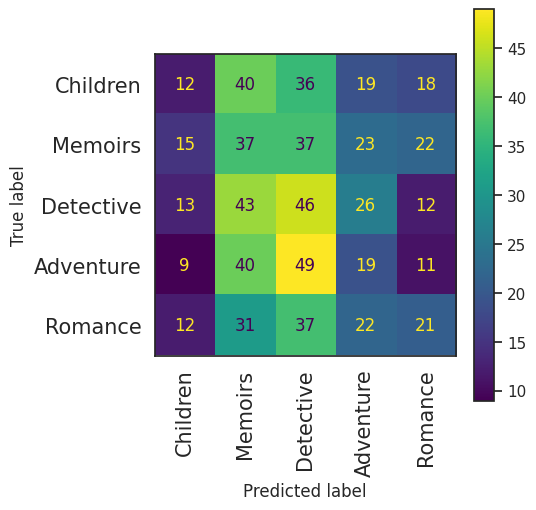

In [41]:
pipe, df_scores, bas = GKF_canonized(df_baseline, 'BASELINE')

### RESULTS BOW

                            precision  recall  f1-score  support
littérature jeunesse            0.459   0.769     0.575  130.000
mémoires et autobiographie      0.799   0.823     0.811  130.000
policier                        0.712   0.438     0.543  130.000
roman d'aventures               0.597   0.731     0.657  130.000
roman sentimental               0.847   0.385     0.529  130.000
accuracy                        0.629   0.629     0.629    0.629
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.459000 & 0.769000 & 0.575000 & 130.000000 \\
mémoires et autobiographie & 0.799000 & 0.823000 & 0.811000 & 130.000000 \\
policier & 0.712000 & 0.438000 & 0.543000 & 130.000000 \\
roman d'aventures & 0.597000 & 0.731000 & 0.657000 & 130.000000 \\
roman sentimental & 0.847000 & 0.385000 & 0.529000 & 130.000000 \\
accuracy & 0.629000 & 0.629000 & 0.629000 & 0.629000 \\
\bottomrule
\end{tabular}

0.6292307692307693


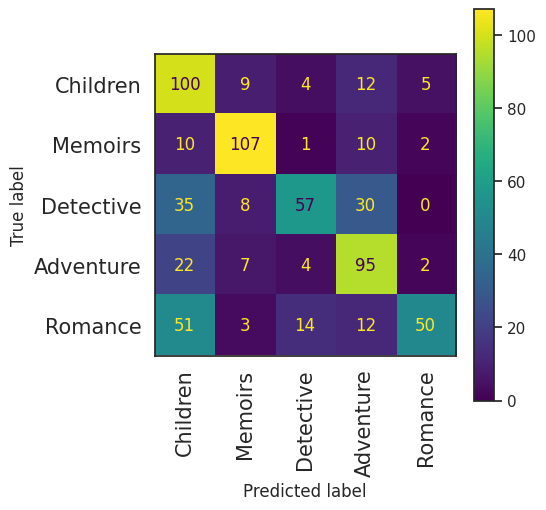

In [42]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_BOW_balanced, 'BOW', probas=True)

                            precision  recall  f1-score  support
littérature jeunesse            0.752   0.746     0.749  130.000
mémoires et autobiographie      0.785   0.815     0.800  130.000
policier                        0.667   0.677     0.672  130.000
roman d'aventures               0.596   0.646     0.620  130.000
roman sentimental               0.858   0.746     0.798  130.000
accuracy                        0.726   0.726     0.726    0.726
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.752000 & 0.746000 & 0.749000 & 130.000000 \\
mémoires et autobiographie & 0.785000 & 0.815000 & 0.800000 & 130.000000 \\
policier & 0.667000 & 0.677000 & 0.672000 & 130.000000 \\
roman d'aventures & 0.596000 & 0.646000 & 0.620000 & 130.000000 \\
roman sentimental & 0.858000 & 0.746000 & 0.798000 & 130.000000 \\
accuracy & 0.726000 & 0.726000 & 0.726000 & 0.726000 \\
\bottomrule
\end{tabular}

0.7261538461538461


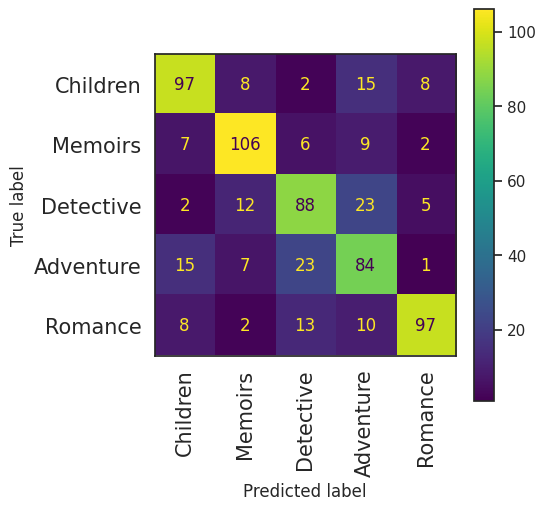

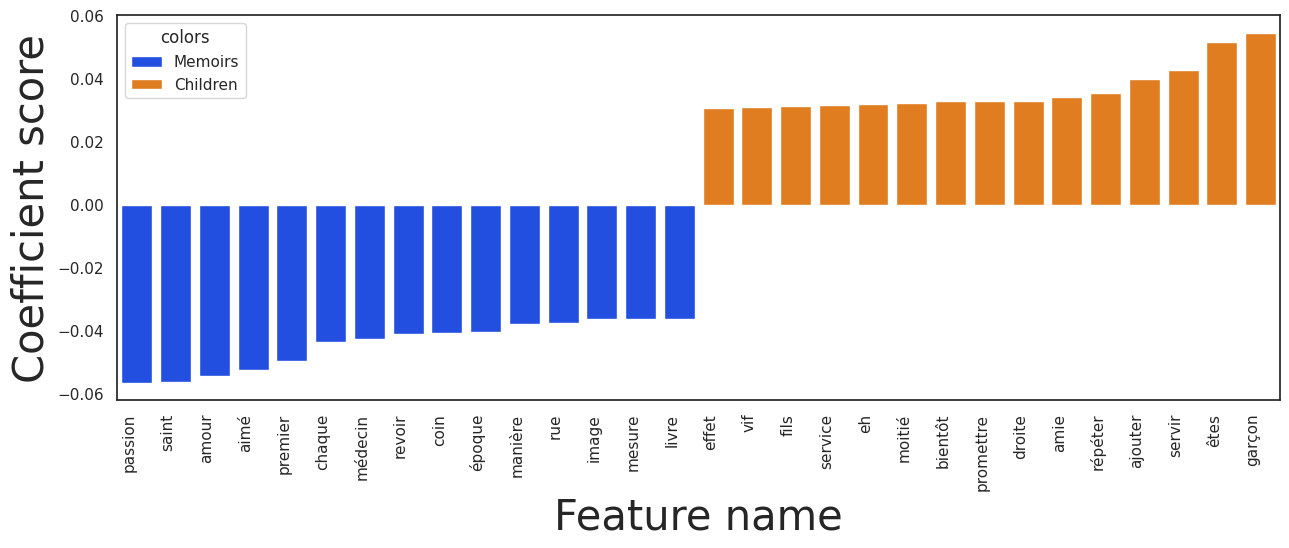

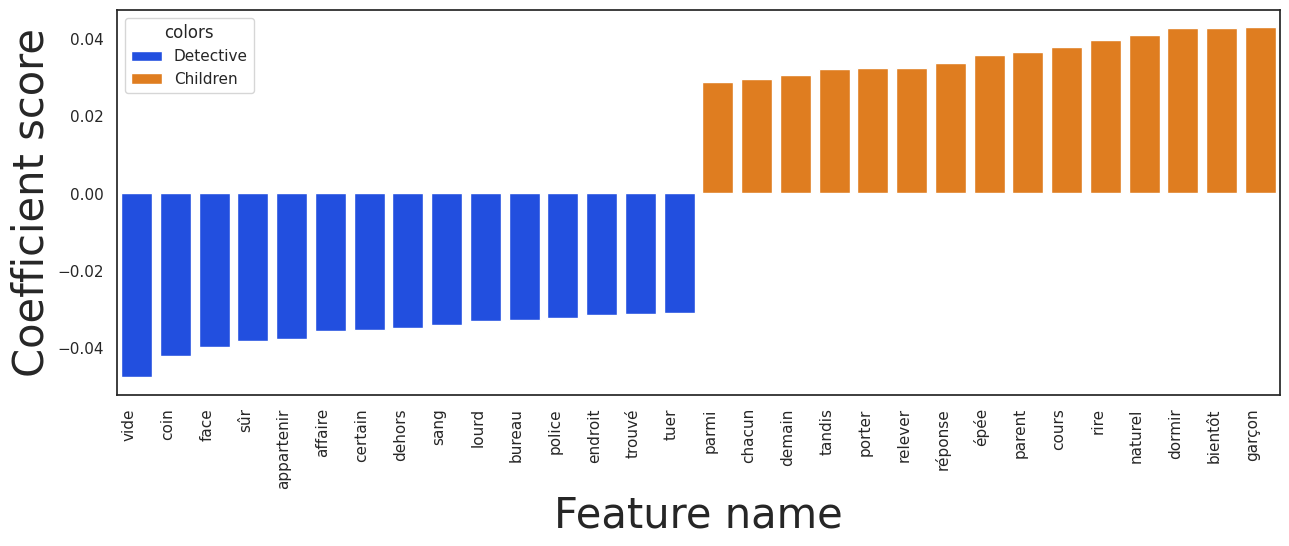

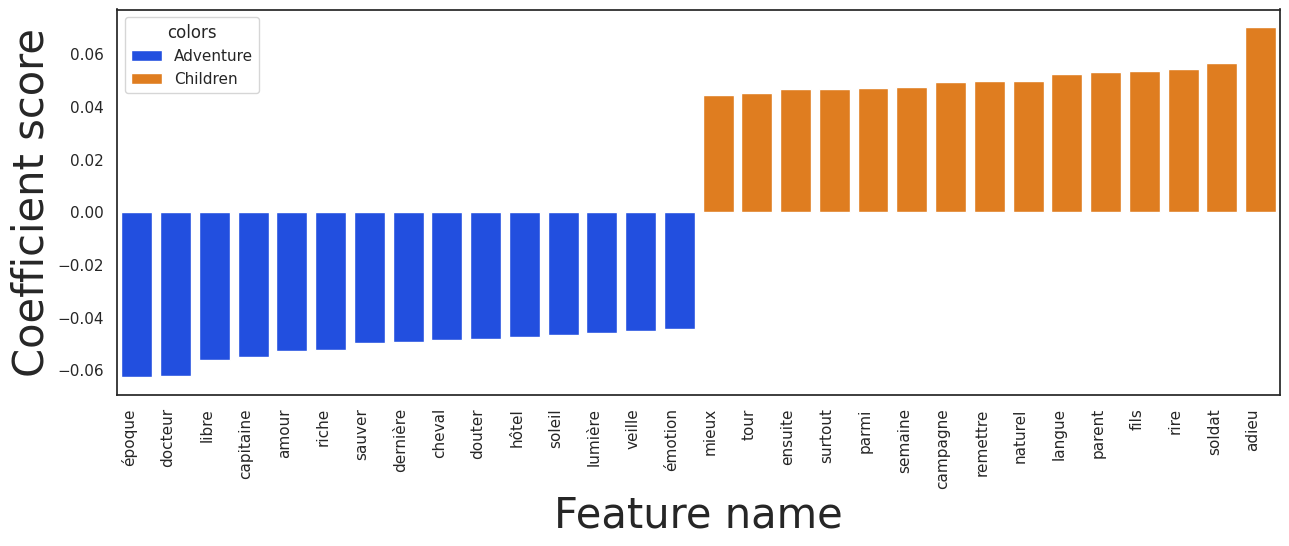

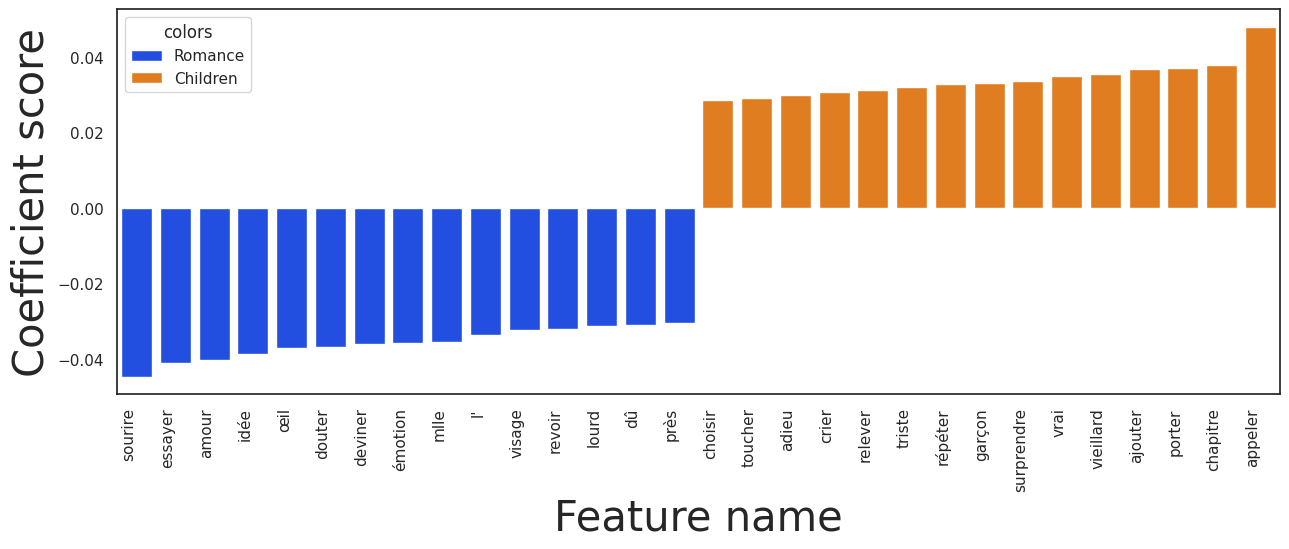

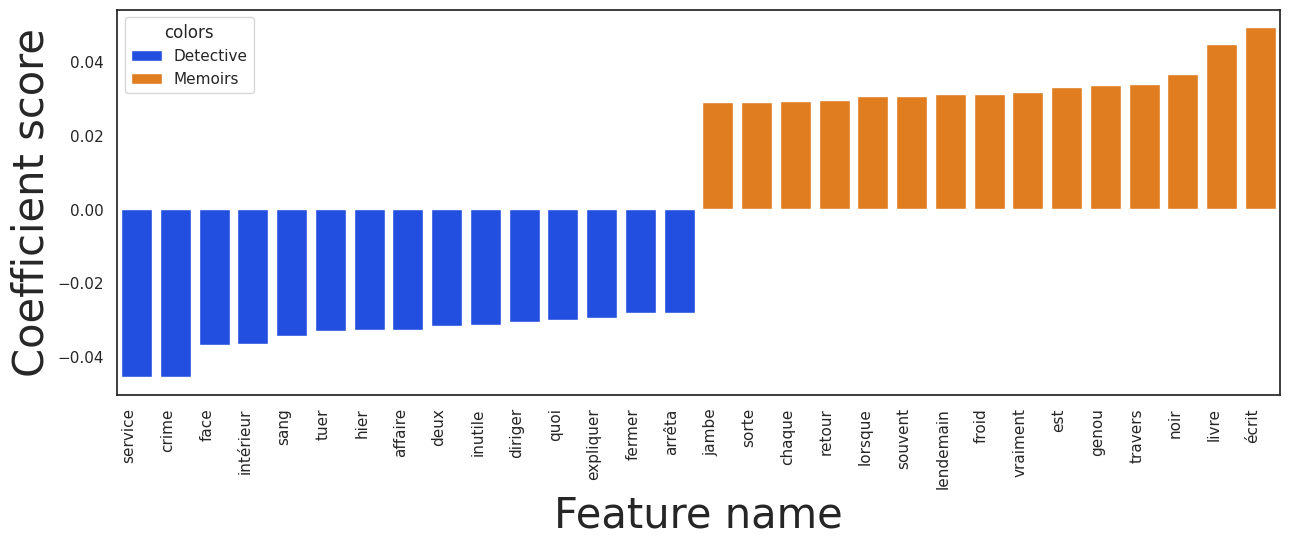

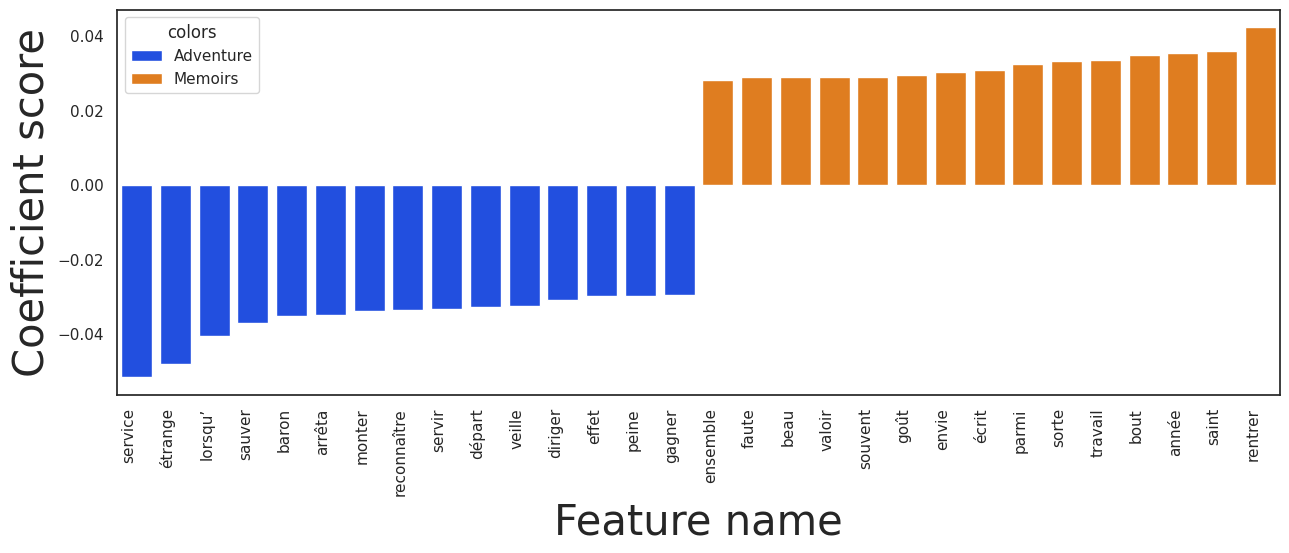

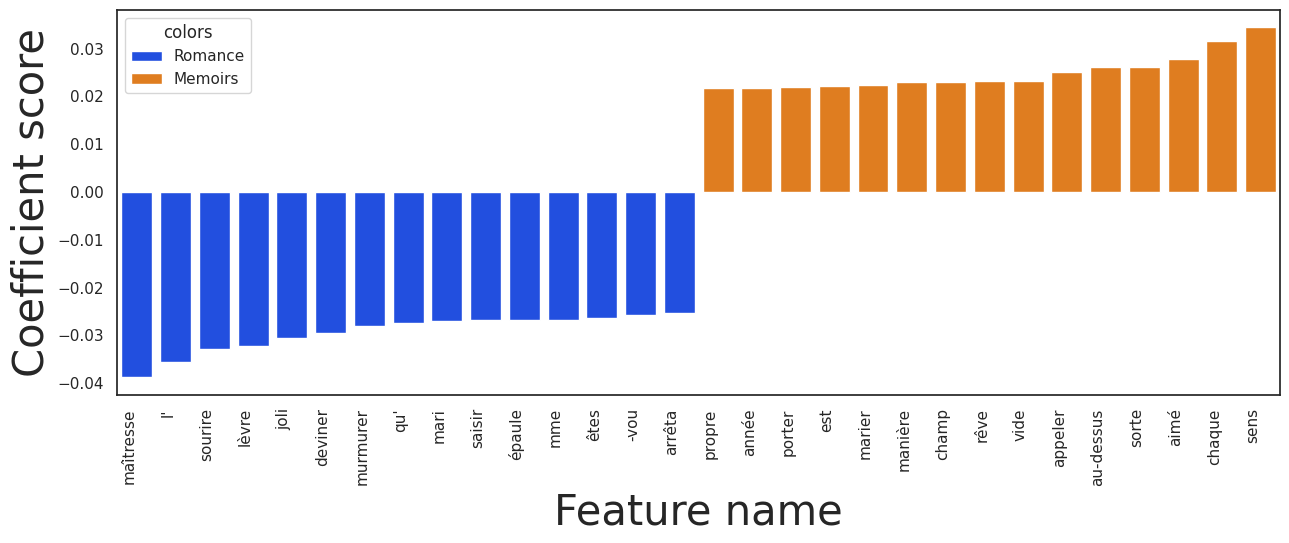

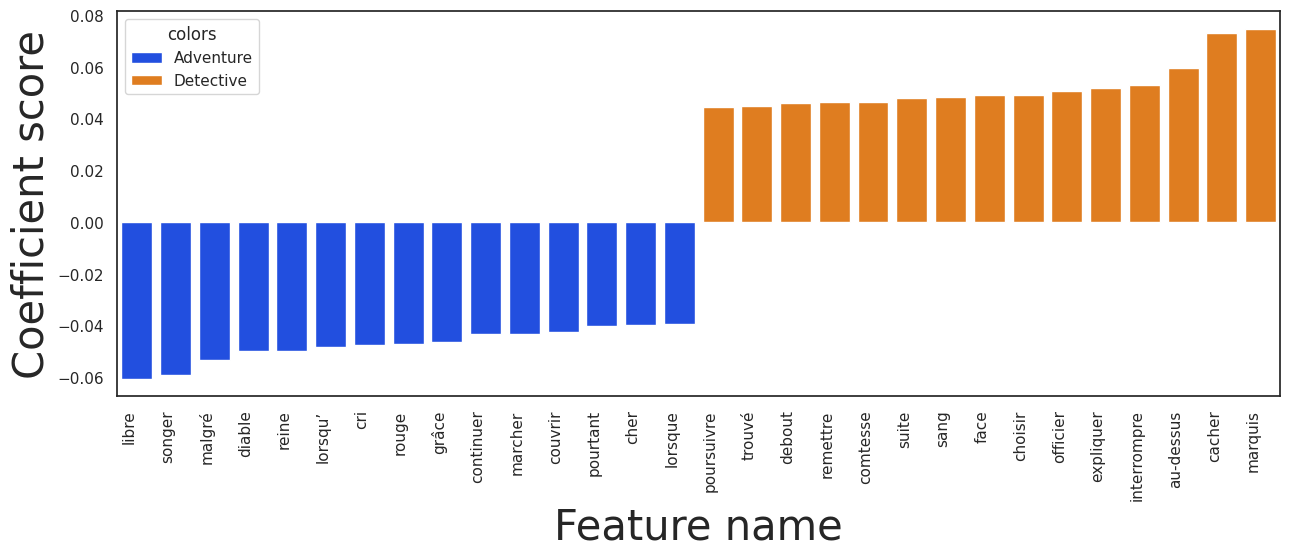

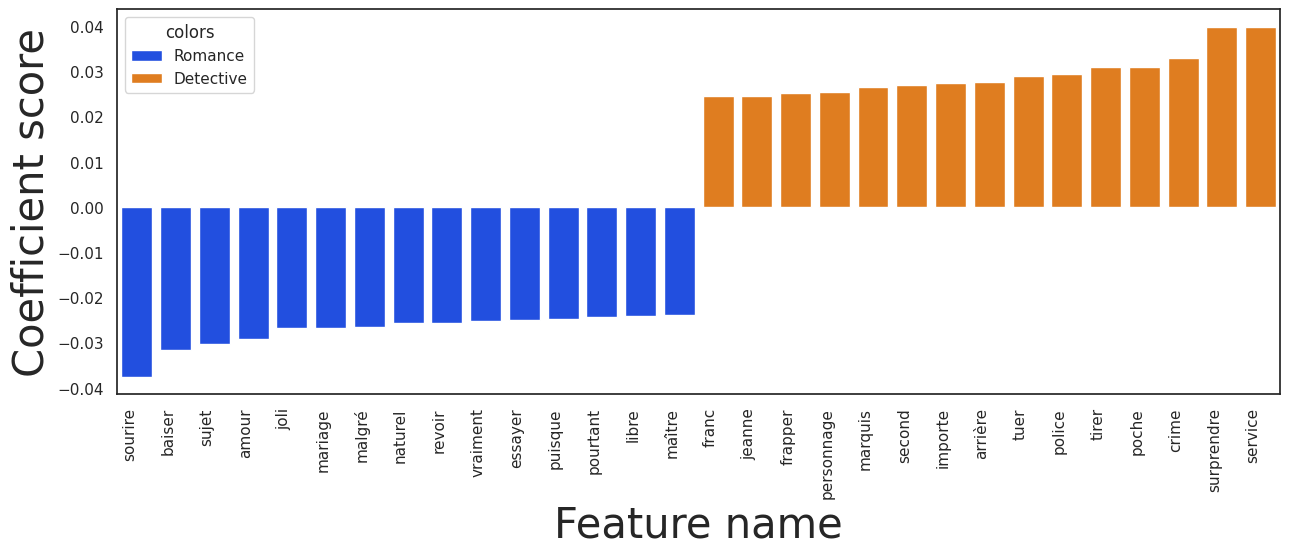

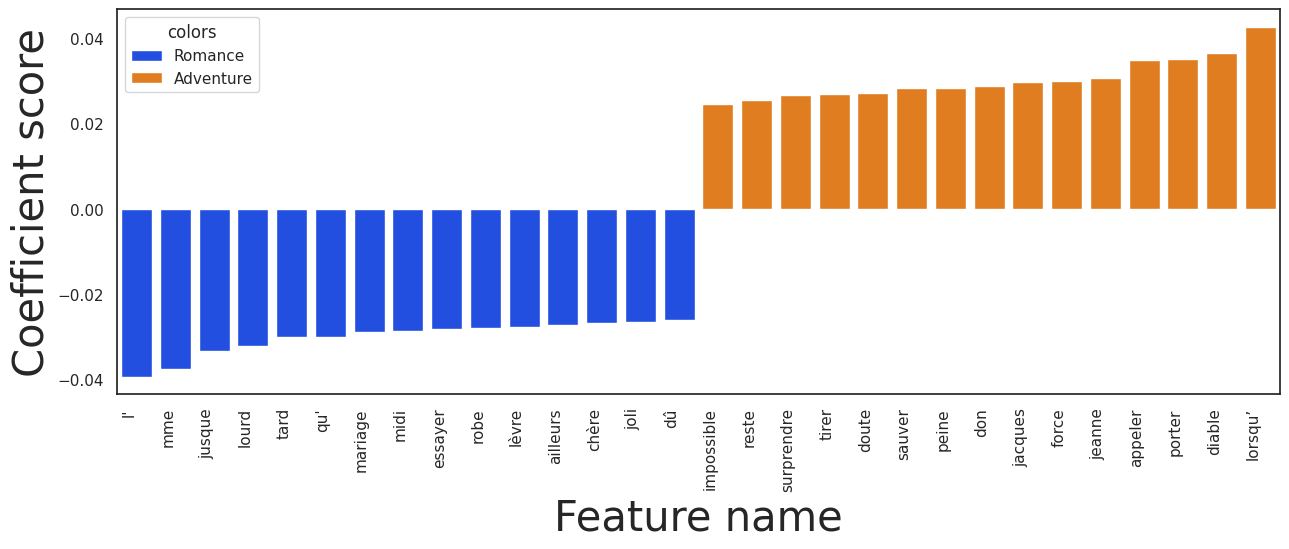

In [43]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_BOW_balanced, 'BOW', kernel='linear', probas=True, get_coefs=True)

                            precision    recall  f1-score     support
littérature jeunesse         0.786765  0.823077  0.804511  130.000000
mémoires et autobiographie   0.825758  0.838462  0.832061  130.000000
policier                     0.725806  0.692308  0.708661  130.000000
roman d'aventures            0.611111  0.761538  0.678082  130.000000
roman sentimental            0.906250  0.669231  0.769912  130.000000
accuracy                     0.756923  0.756923  0.756923    0.756923
0.7569230769230768


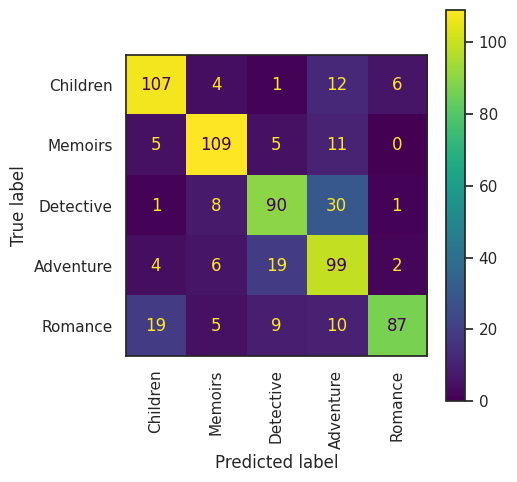

In [203]:
pipe, df_scores, bas = GKF_canonized(df_BOW_balanced, 'BOW', kernel="linear")

                            precision    recall  f1-score     support
littérature jeunesse         0.915254  0.830769  0.870968  130.000000
mémoires et autobiographie   0.870504  0.930769  0.899628  130.000000
policier                     0.877049  0.823077  0.849206  130.000000
roman d'aventures            0.780142  0.846154  0.811808  130.000000
roman sentimental            0.946154  0.946154  0.946154  130.000000
accuracy                     0.875385  0.875385  0.875385    0.875385
0.8753846153846153


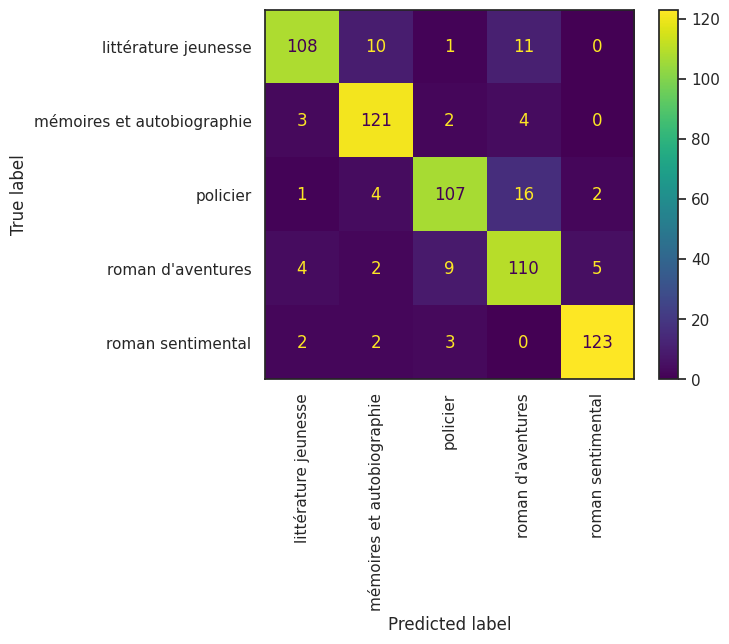

In [126]:
pipe, df_scores, bas = KF_canonized(df_BOW_balanced, kernel="linear")

### RESULTS ALL

                            precision  recall  f1-score  support
littérature jeunesse             0.68    0.78      0.73   130.00
mémoires et autobiographie       0.78    0.92      0.85   130.00
policier                         0.73    0.65      0.69   130.00
roman d'aventures                0.69    0.80      0.74   130.00
roman sentimental                0.90    0.57      0.70   130.00
accuracy                         0.75    0.75      0.75     0.75
0.7461538461538462
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.680000 & 0.780000 & 0.730000 & 130.000000 \\
mémoires et autobiographie & 0.780000 & 0.920000 & 0.850000 & 130.000000 \\
policier & 0.730000 & 0.650000 & 0.690000 & 130.000000 \\
roman d'aventures & 0.690000 & 0.800000 & 0.740000 & 130.000000 \\
roman sentimental & 0.900000 & 0.570000 & 0.700000 & 130.000000 \\
accuracy & 0.750000 & 0.750000 & 0.750000 & 0.750000 \\
\bottomrule
\end{tabular}



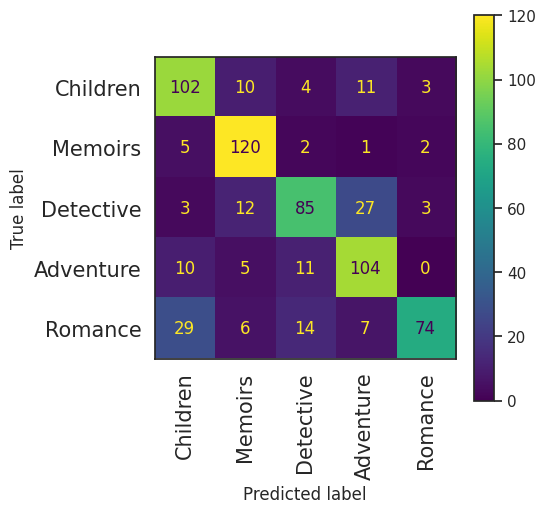

In [58]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_ALL_balanced, 'ALL', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.640523  0.753846  0.692580  130.000000
mémoires et autobiographie   0.805970  0.830769  0.818182  130.000000
policier                     0.779661  0.707692  0.741935  130.000000
roman d'aventures            0.666667  0.738462  0.700730  130.000000
roman sentimental            0.851485  0.661538  0.744589  130.000000
accuracy                     0.738462  0.738462  0.738462    0.738462
0.7384615384615385


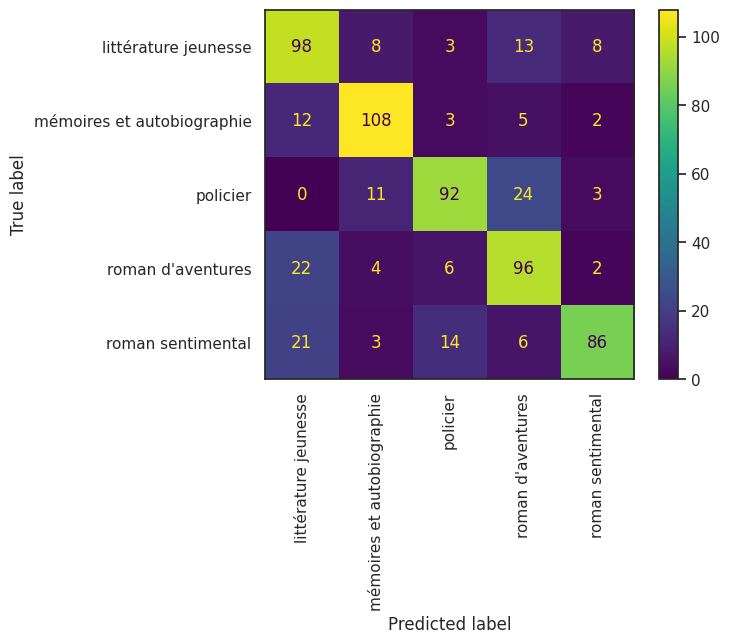

In [144]:
pipe, df_scores, bas = GKF_canonized(df_ALL_balanced, kernel='linear')

0.8476923076923077


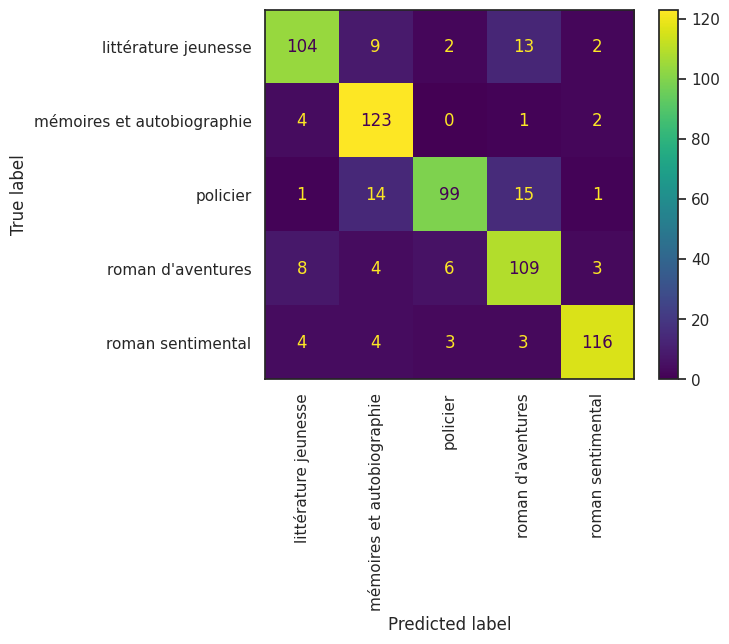

In [108]:
pipe, df_scores, bas = KF_canonized(df_ALL_balanced)

0.8369230769230768


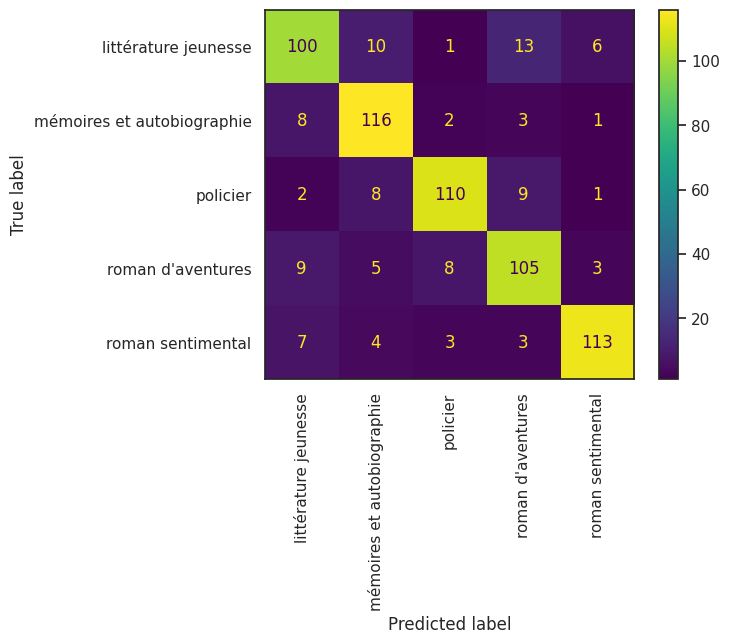

In [109]:
pipe, df_scores, bas = KF_canonized(df_ALL_balanced, kernel="linear")

### RESULTS CHRONOCHAR

                            precision  recall  f1-score  support
littérature jeunesse             0.65    0.79      0.71   130.00
mémoires et autobiographie       0.79    0.89      0.84   130.00
policier                         0.73    0.68      0.70   130.00
roman d'aventures                0.73    0.73      0.73   130.00
roman sentimental                0.90    0.65      0.75   130.00
accuracy                         0.75    0.75      0.75     0.75
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.650000 & 0.790000 & 0.710000 & 130.000000 \\
mémoires et autobiographie & 0.790000 & 0.890000 & 0.840000 & 130.000000 \\
policier & 0.730000 & 0.680000 & 0.700000 & 130.000000 \\
roman d'aventures & 0.730000 & 0.730000 & 0.730000 & 130.000000 \\
roman sentimental & 0.900000 & 0.650000 & 0.750000 & 130.000000 \\
accuracy & 0.750000 & 0.750000 & 0.750000 & 0.750000 \\
\bottomrule
\end{tabular}

0.7476923076923077


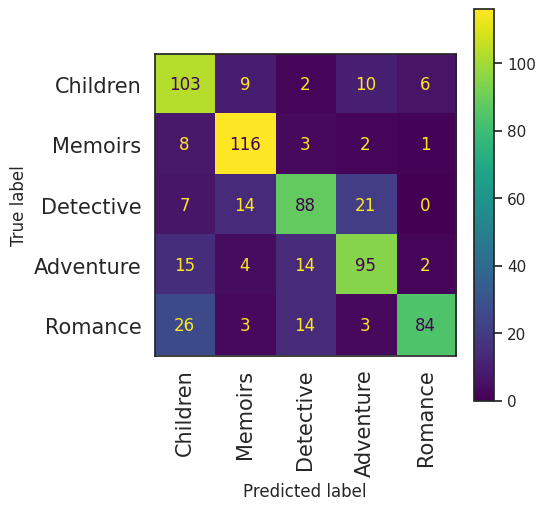

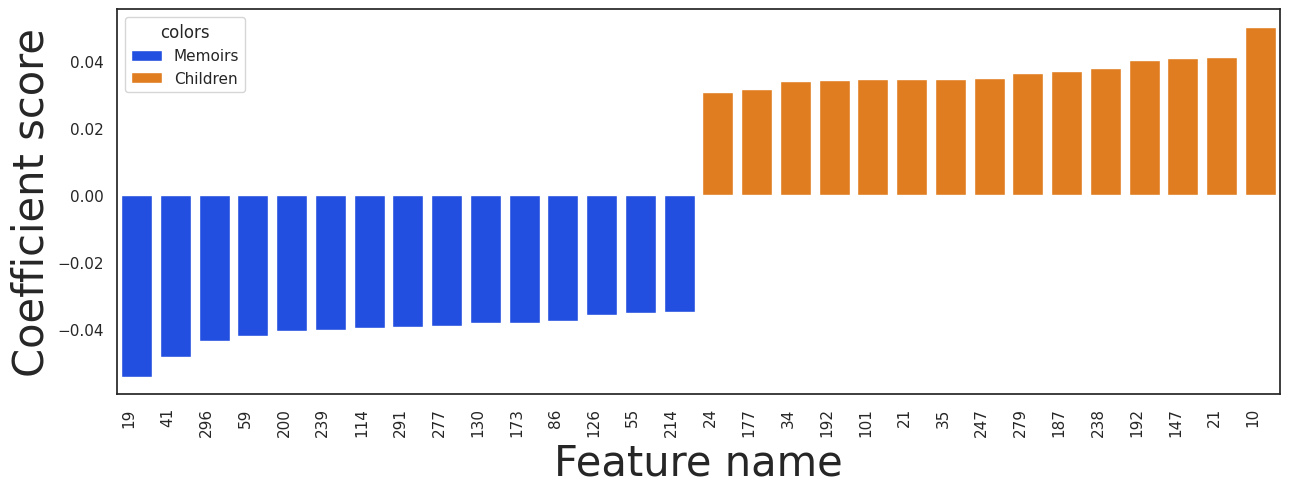

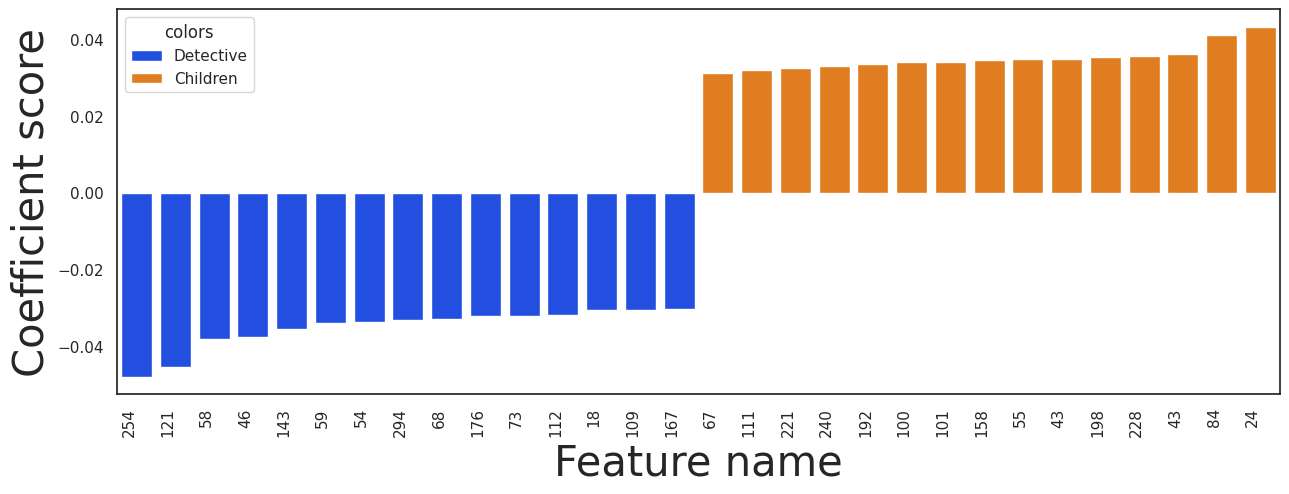

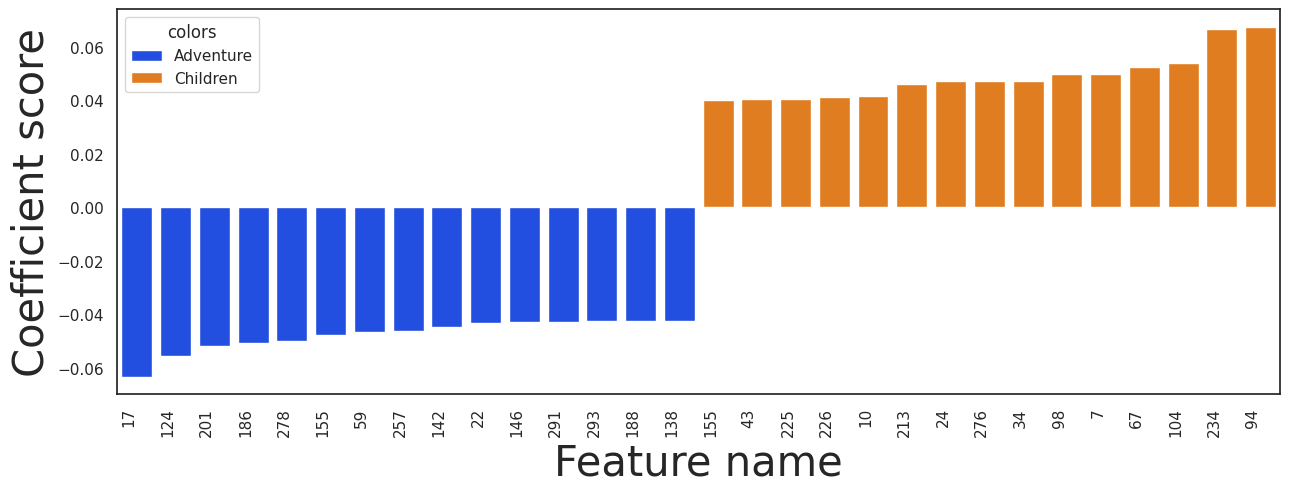

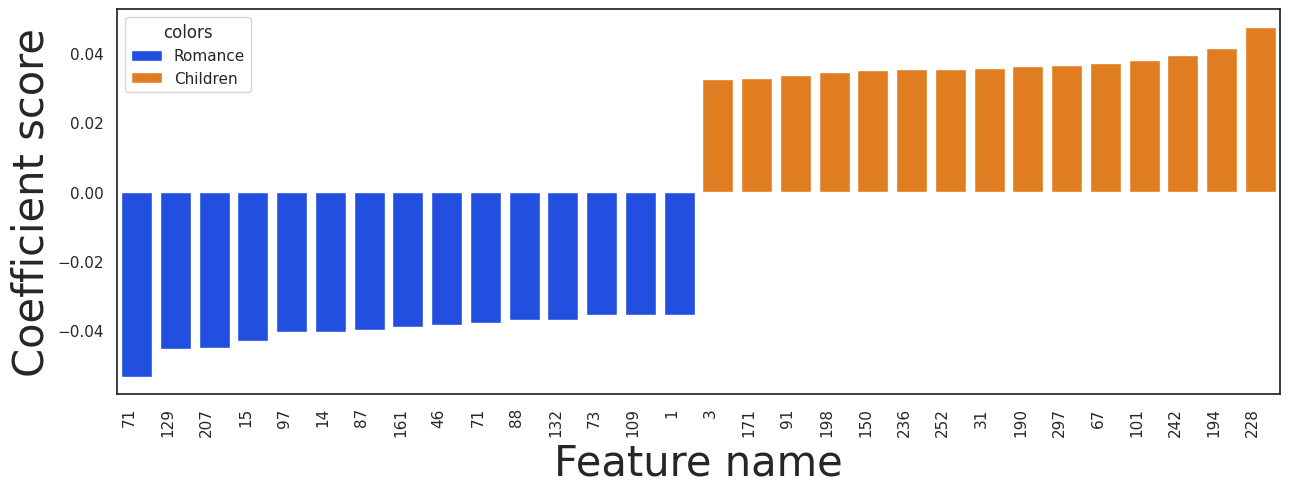

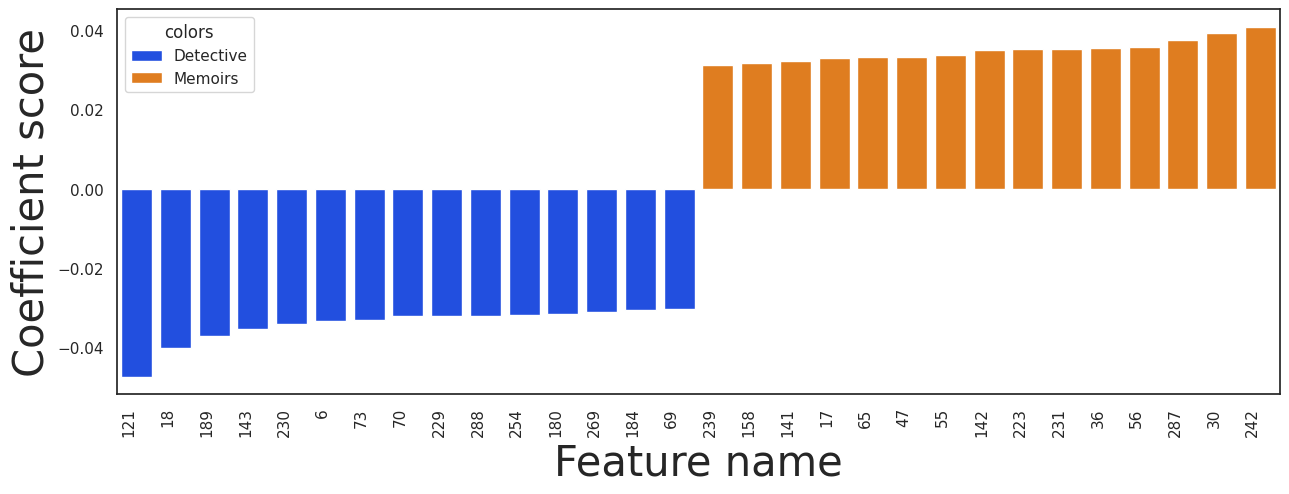

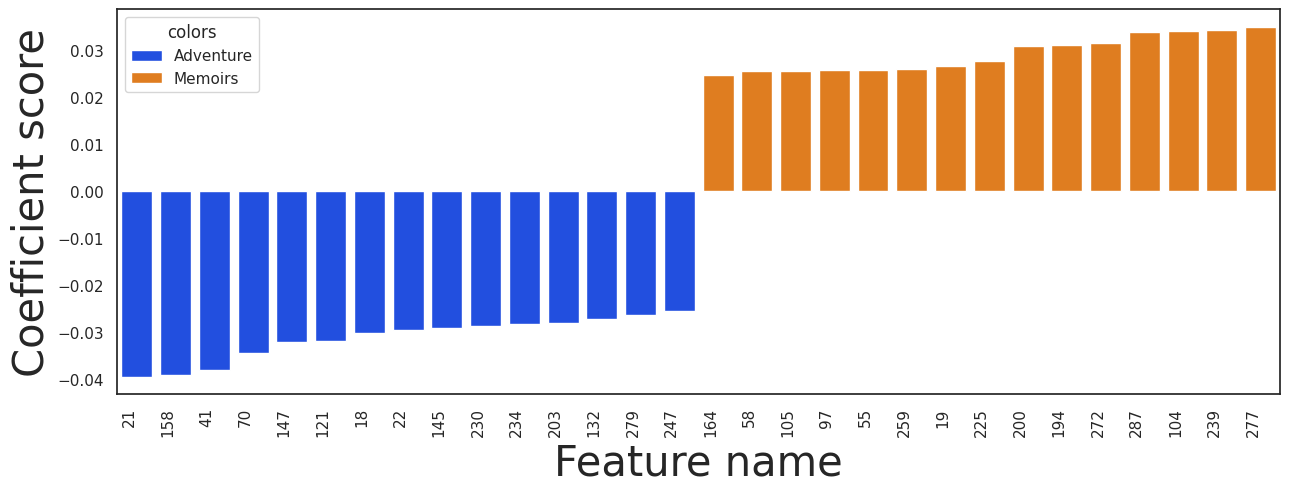

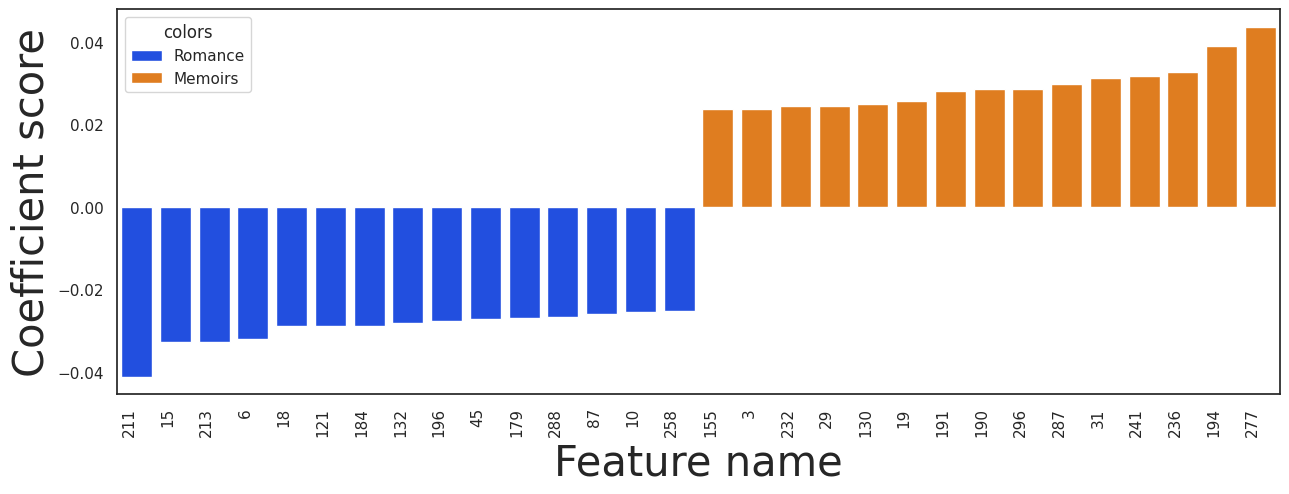

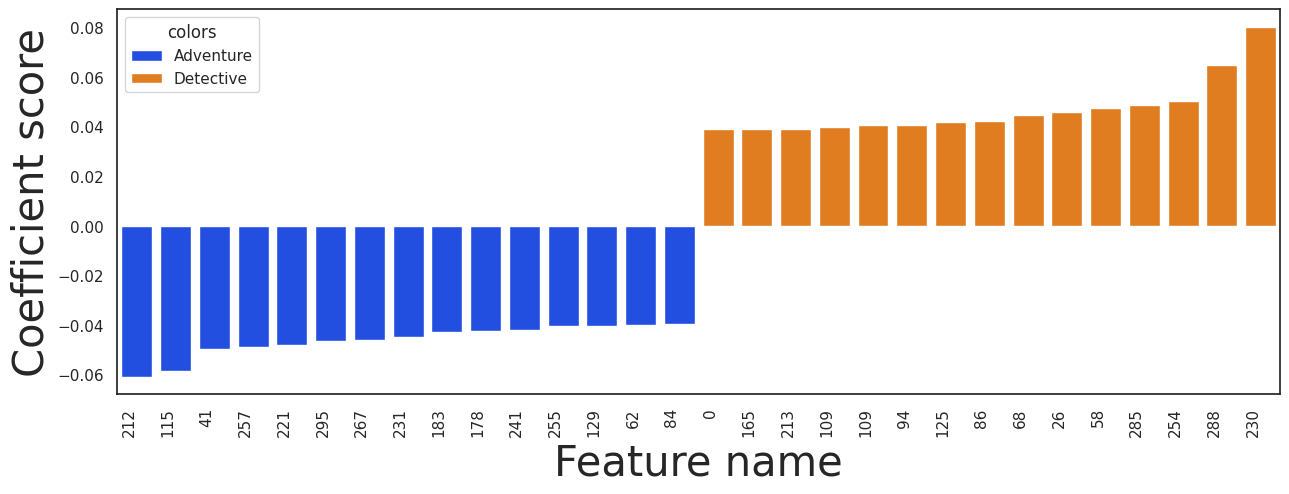

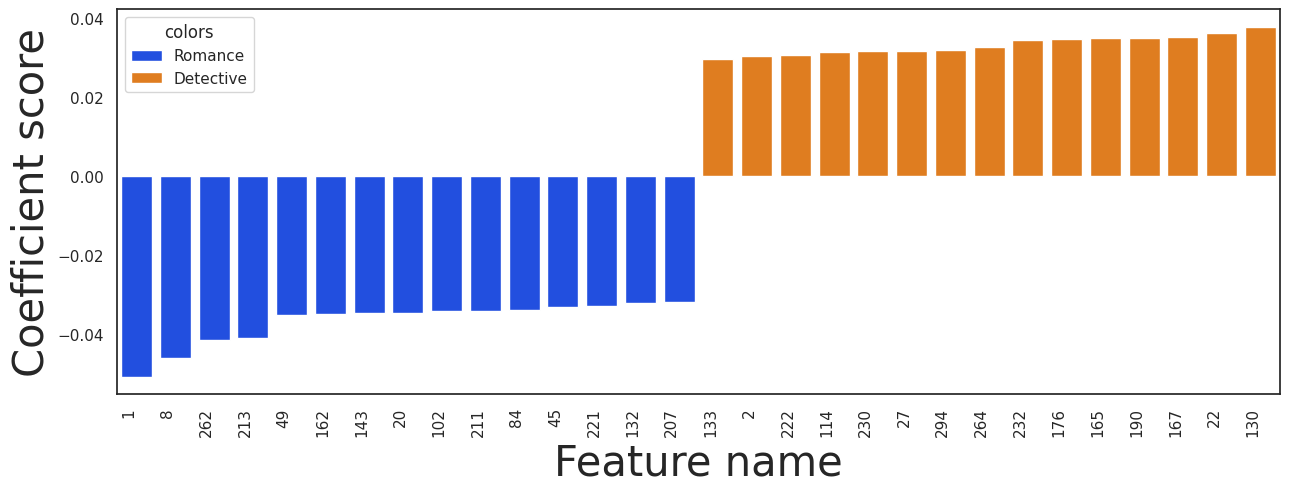

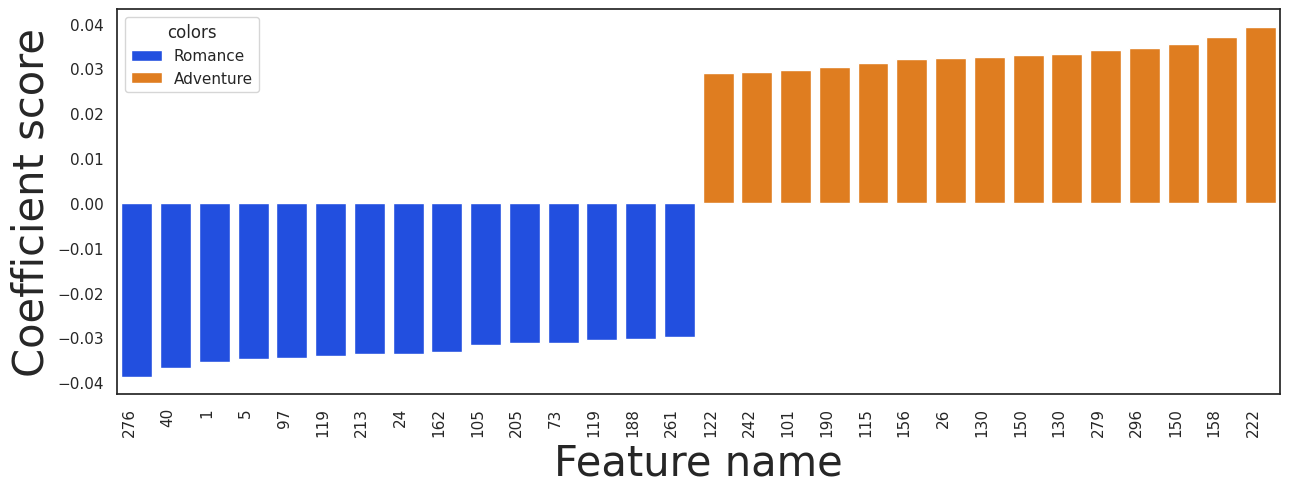

In [67]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_CHRONOCHAR_CONCAT_balanced, 'CHRONO_CHAR', probas=True, kernel='linear')

0.8323076923076924


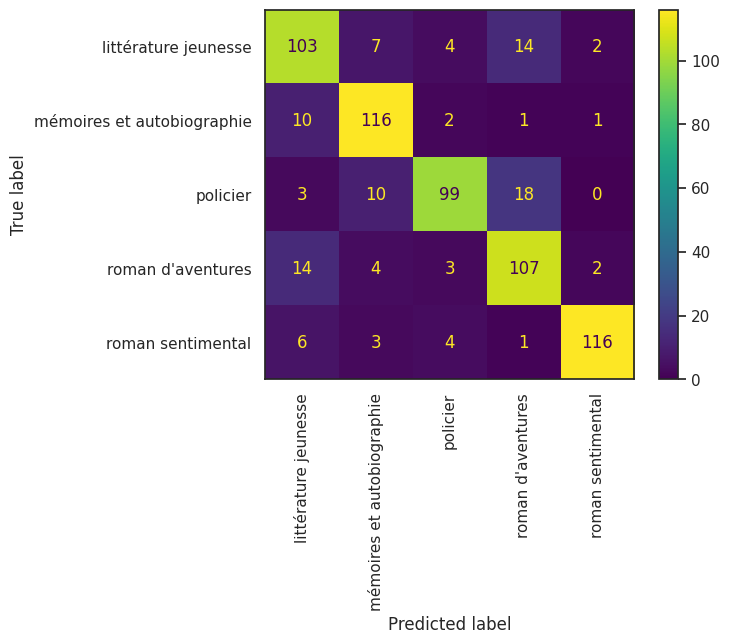

In [110]:
pipe, df_scores, bas = KF_canonized(df_CHRONOCHAR_CONCAT_balanced)

0.836923076923077


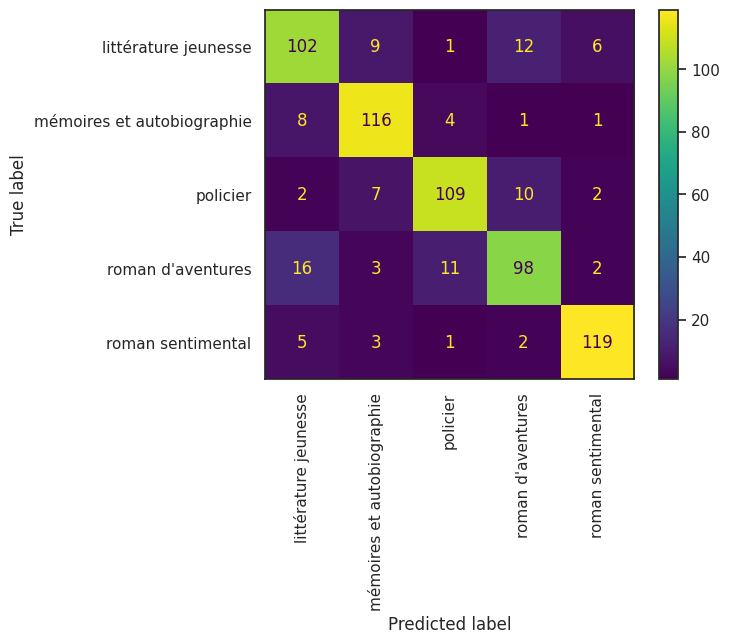

In [111]:
pipe, df_scores, bas = KF_canonized(df_CHRONOCHAR_CONCAT_balanced, kernel="linear")

### RESULTS MAIN CONCAT

                            precision  recall  f1-score  support
littérature jeunesse             0.65    0.81      0.72   130.00
mémoires et autobiographie       0.82    0.87      0.84   130.00
policier                         0.72    0.67      0.69   130.00
roman d'aventures                0.71    0.75      0.73   130.00
roman sentimental                0.91    0.65      0.76   130.00
accuracy                         0.75    0.75      0.75     0.75
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.650000 & 0.810000 & 0.720000 & 130.000000 \\
mémoires et autobiographie & 0.820000 & 0.870000 & 0.840000 & 130.000000 \\
policier & 0.720000 & 0.670000 & 0.690000 & 130.000000 \\
roman d'aventures & 0.710000 & 0.750000 & 0.730000 & 130.000000 \\
roman sentimental & 0.910000 & 0.650000 & 0.760000 & 130.000000 \\
accuracy & 0.750000 & 0.750000 & 0.750000 & 0.750000 \\
\bottomrule
\end{tabular}

0.7492307692307693


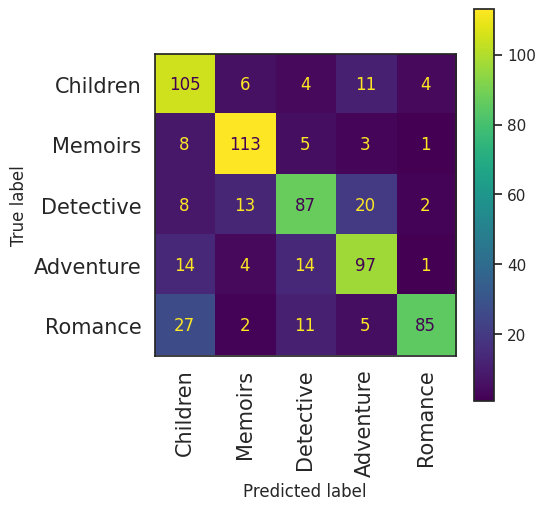

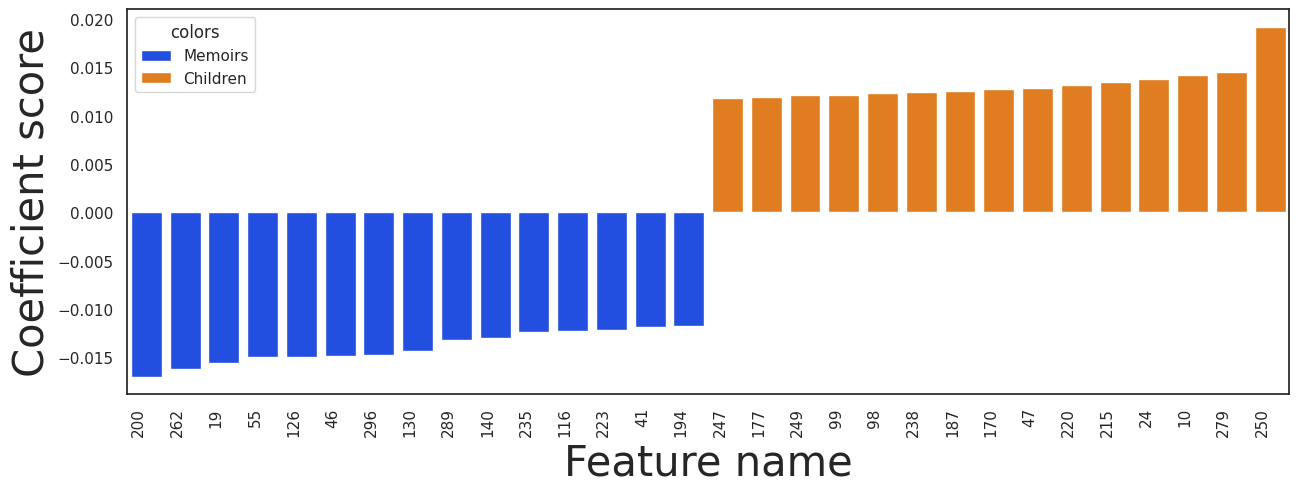

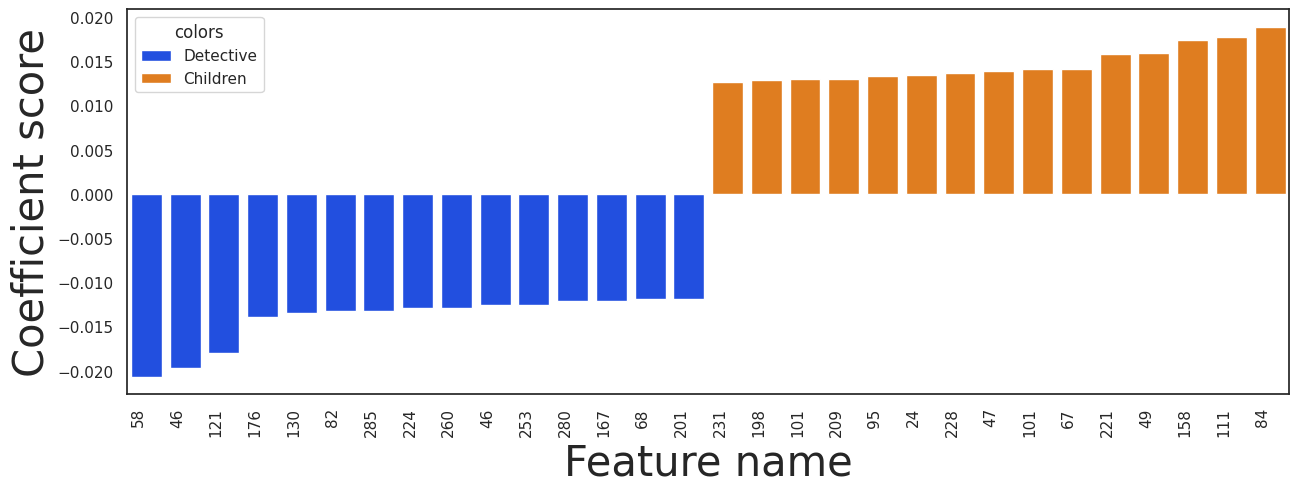

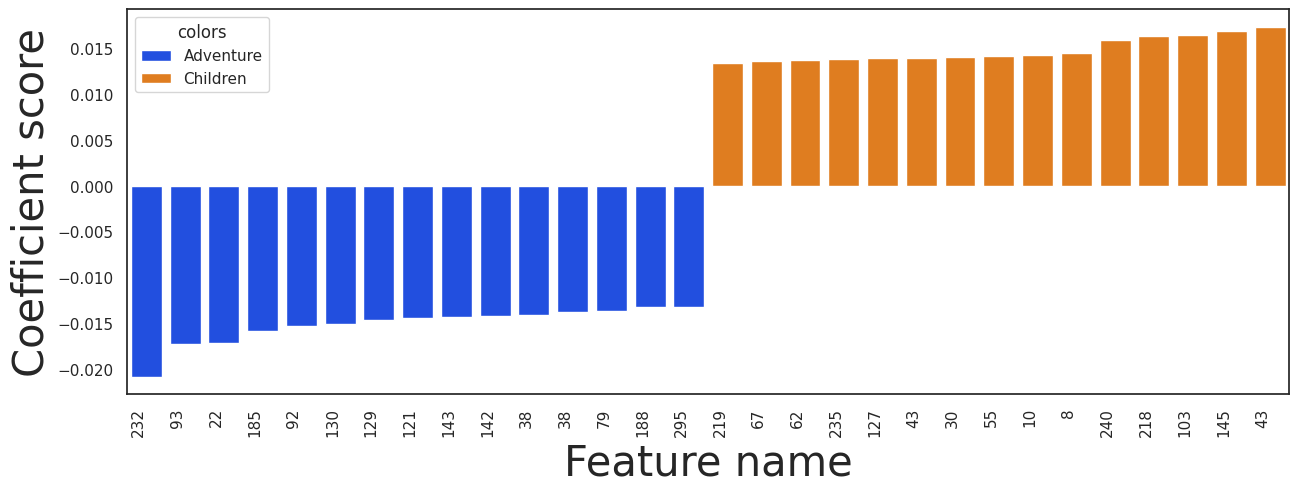

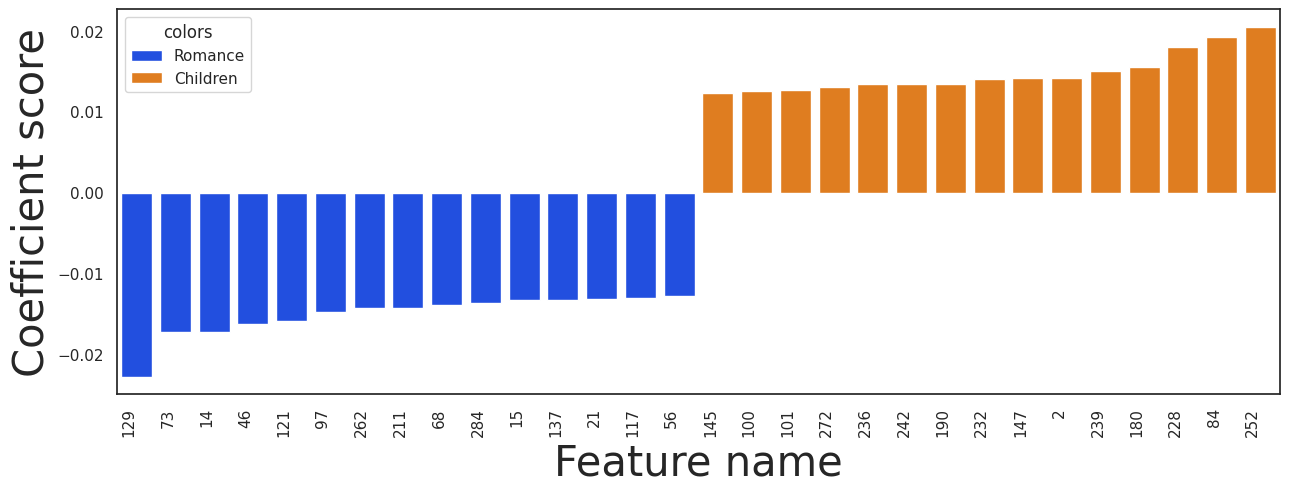

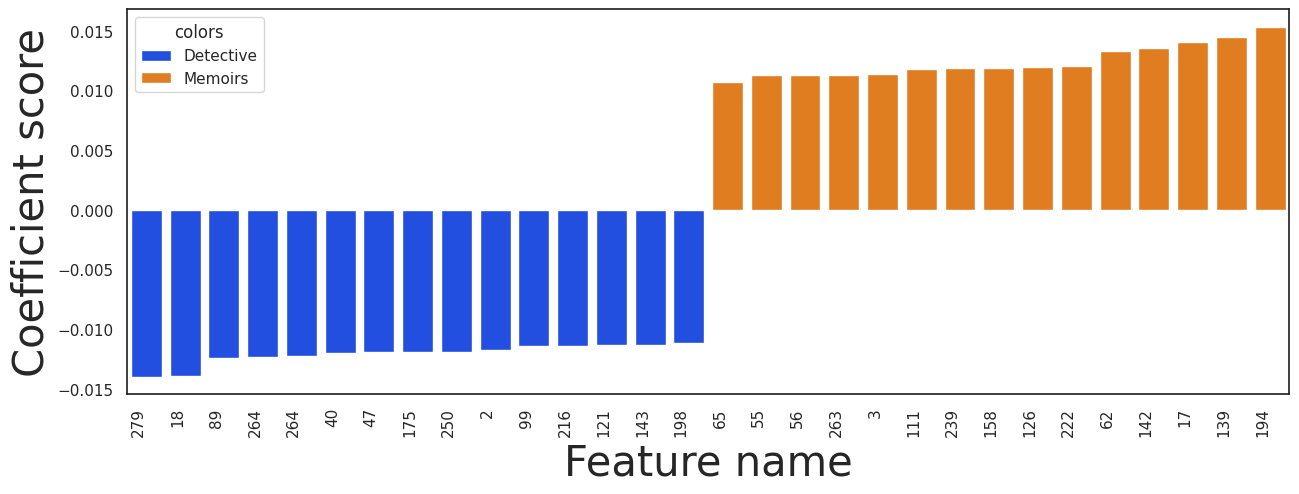

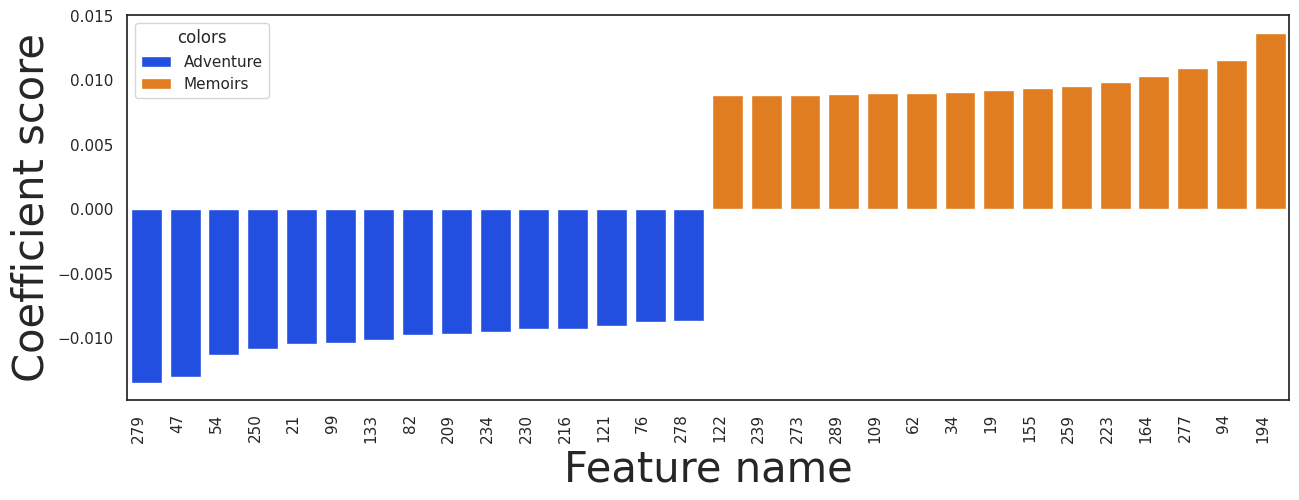

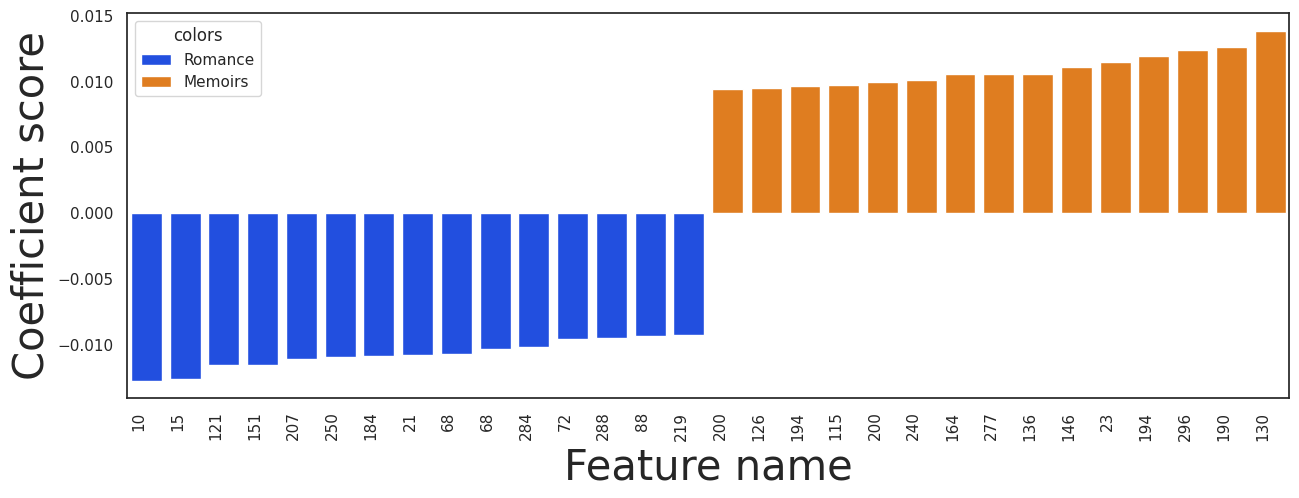

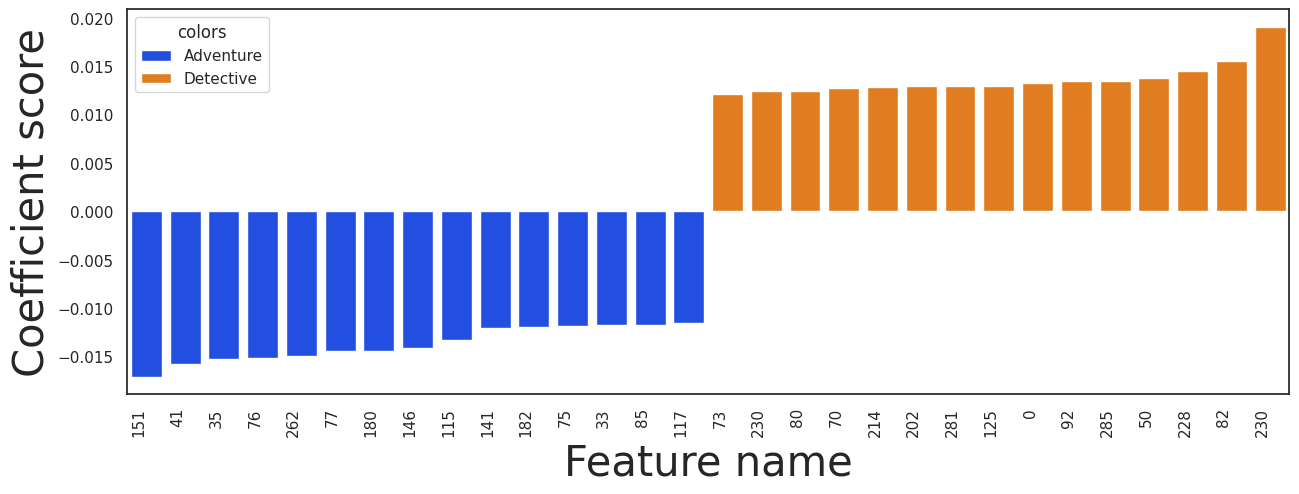

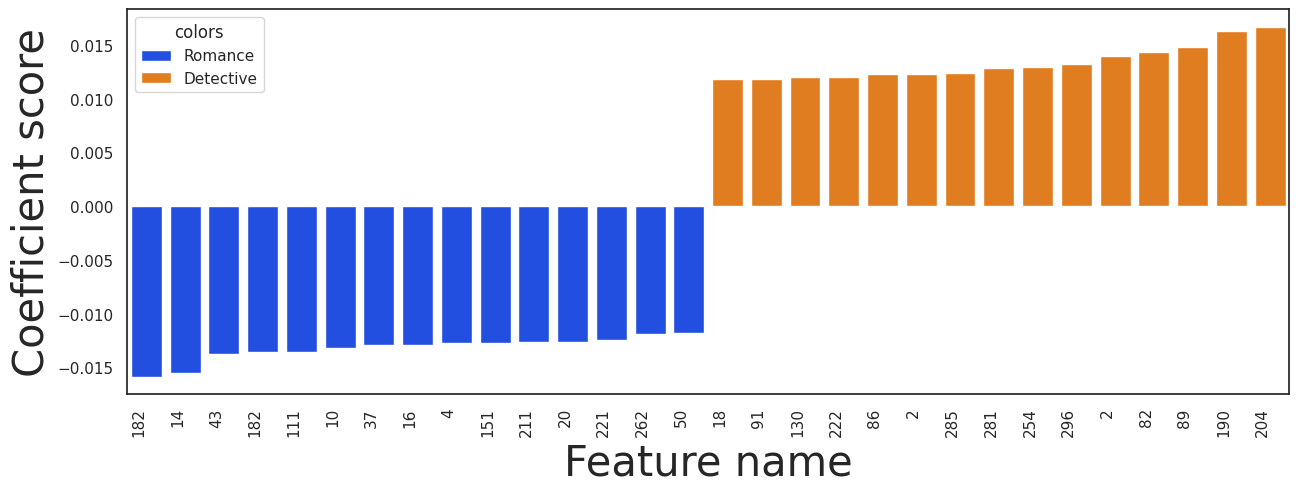

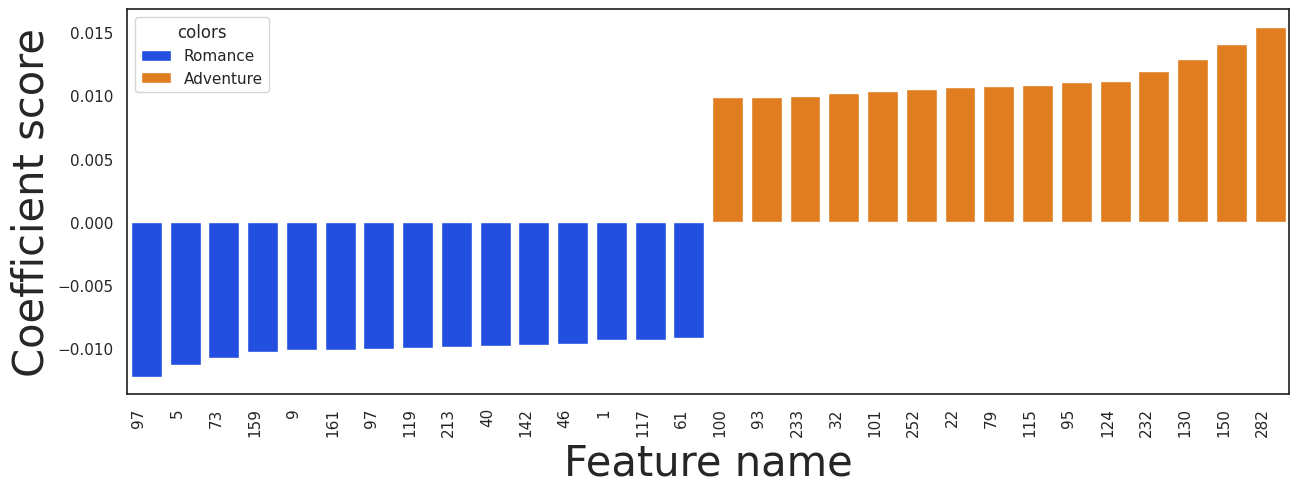

In [68]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_MAIN_CONCAT_balanced, 'ALL_CONCAT', probas=True, kernel='linear', get_coefs=True)

                            precision  recall  f1-score  support
littérature jeunesse             0.55    0.74      0.63   130.00
mémoires et autobiographie       0.76    0.85      0.80   130.00
policier                         0.76    0.59      0.67   130.00
roman d'aventures                0.63    0.82      0.71   130.00
roman sentimental                0.92    0.45      0.60   130.00
accuracy                         0.69    0.69      0.69     0.69
0.6876923076923077


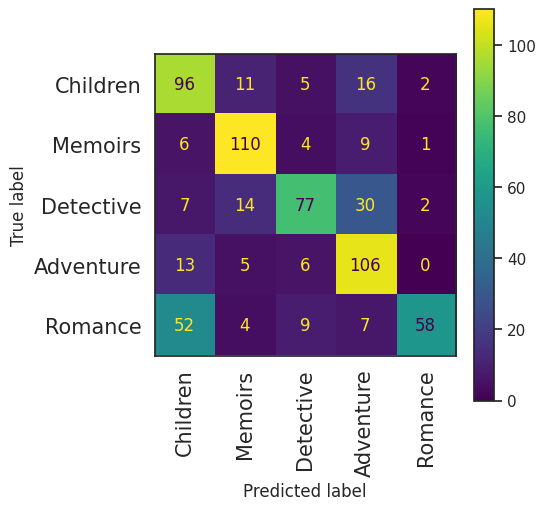

In [59]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_MAIN_CONCAT_balanced, 'ALL_CONCAT', probas=True)

                            precision    recall  f1-score     support
littérature jeunesse         0.570588  0.746154  0.646667  130.000000
mémoires et autobiographie   0.784173  0.838462  0.810409  130.000000
policier                     0.765306  0.576923  0.657895  130.000000
roman d'aventures            0.615819  0.838462  0.710098  130.000000
roman sentimental            0.924242  0.469231  0.622449  130.000000
accuracy                     0.693846  0.693846  0.693846    0.693846
0.693846153846154


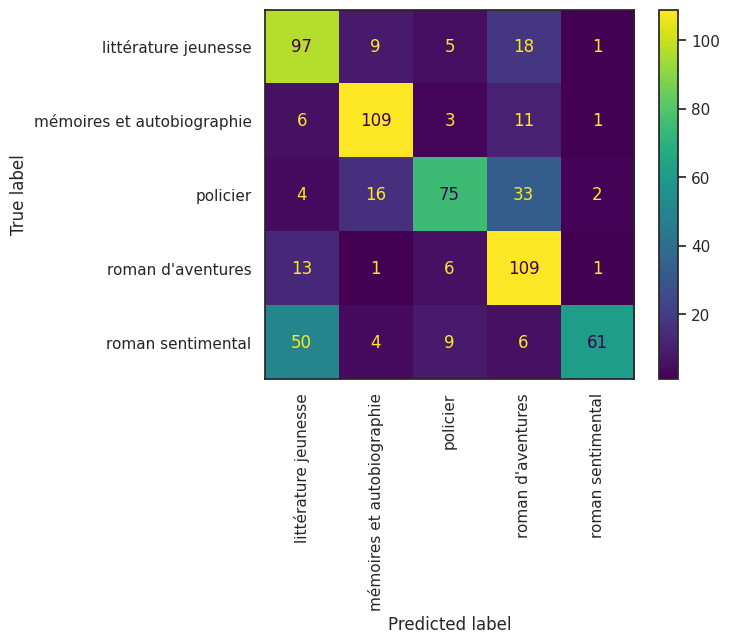

In [148]:
pipe, df_scores, bas = GKF_canonized(df_MAIN_CONCAT_balanced)

                            precision    recall  f1-score     support
littérature jeunesse         0.608434  0.776923  0.682432  130.000000
mémoires et autobiographie   0.811594  0.861538  0.835821  130.000000
policier                     0.763636  0.646154  0.700000  130.000000
roman d'aventures            0.706294  0.776923  0.739927  130.000000
roman sentimental            0.870968  0.623077  0.726457  130.000000
accuracy                     0.736923  0.736923  0.736923    0.736923
0.7369230769230769


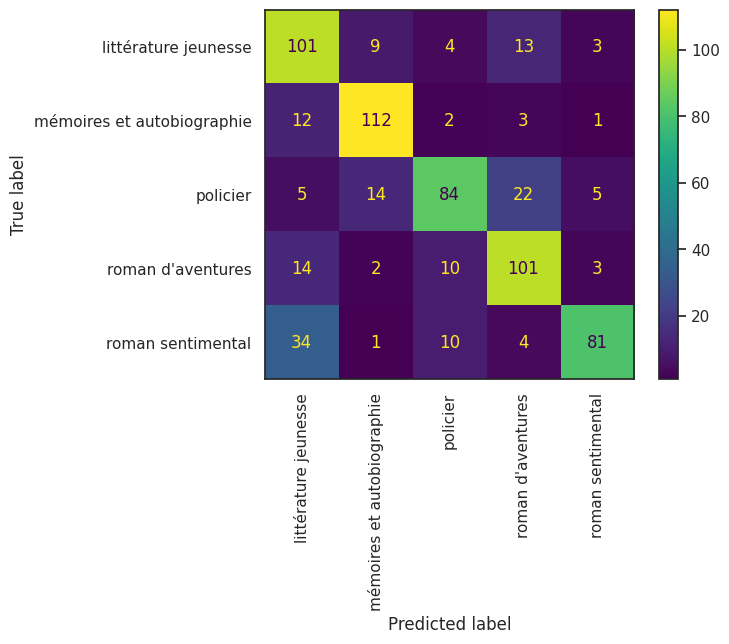

In [149]:
pipe, df_scores, bas = GKF_canonized(df_MAIN_CONCAT_balanced, kernel='linear')

0.8123076923076923


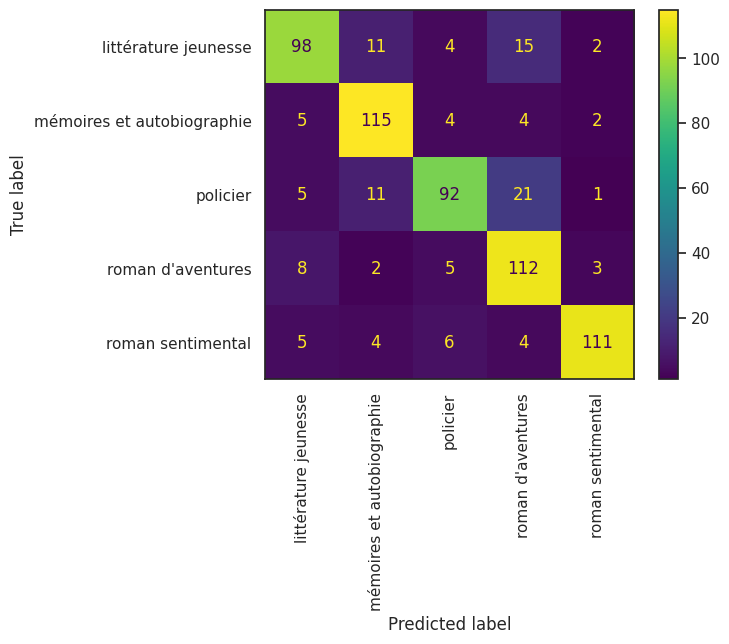

In [112]:
pipe, df_scores, bas = KF_canonized(df_MAIN_CONCAT_balanced)

0.8415384615384616


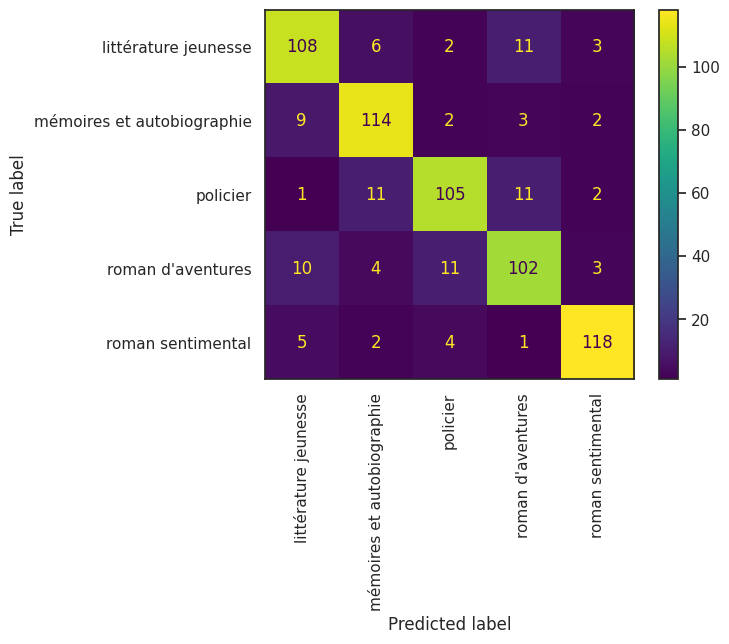

In [113]:
pipe, df_scores, bas = KF_canonized(df_MAIN_CONCAT_balanced, kernel="linear")

                            precision    recall  f1-score     support
littérature jeunesse         0.520468  0.684615  0.591362  130.000000
mémoires et autobiographie   0.691358  0.861538  0.767123  130.000000
policier                     0.691489  0.500000  0.580357  130.000000
roman d'aventures            0.558140  0.738462  0.635762  130.000000
roman sentimental            0.862745  0.338462  0.486188  130.000000
accuracy                     0.624615  0.624615  0.624615    0.624615
0.6246153846153846
                            precision    recall  f1-score     support
littérature jeunesse         0.590361  0.753846  0.662162  130.000000
mémoires et autobiographie   0.770833  0.853846  0.810219  130.000000
policier                     0.701754  0.615385  0.655738  130.000000
roman d'aventures            0.636986  0.715385  0.673913  130.000000
roman sentimental            0.762500  0.469231  0.580952  130.000000
accuracy                     0.681538  0.681538  0.681538    0.681538
0

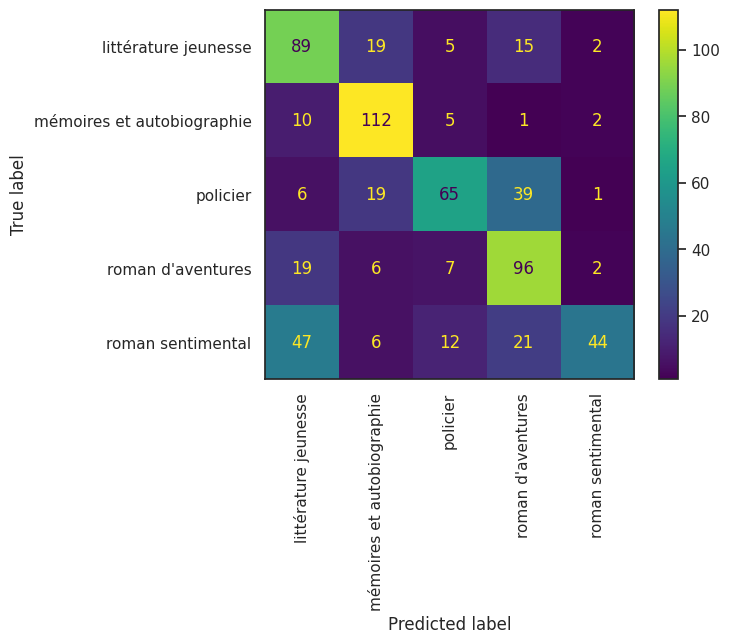

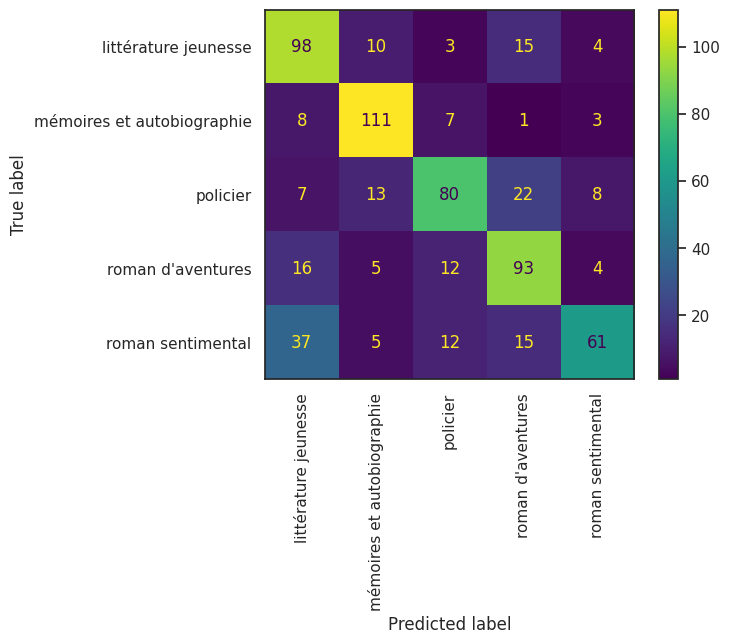

In [153]:
df_TEST_CONCAT = pd.concat([df_AGENT, df_PATIENT, df_ADJ], axis=1)
df_TEST_CONCAT_genred = get_df_with_subgenre(df_TEST_CONCAT, df_corpus, genres_ok)
df_TEST_CONCAT_authored = get_df_with_authors(df_TEST_CONCAT_genred)
df_TEST_CONCAT_balanced = balance_dataframe(df_TEST_CONCAT_authored, 'subgenre', 130)

pipe, df_scores, bas = GKF_canonized(df_TEST_CONCAT_balanced)
pipe, df_scores, bas = GKF_canonized(df_TEST_CONCAT_balanced, kernel='linear')

                            precision    recall  f1-score     support
littérature jeunesse         0.487805  0.769231  0.597015  130.000000
mémoires et autobiographie   0.796296  0.661538  0.722689  130.000000
policier                     0.759259  0.630769  0.689076  130.000000
roman d'aventures            0.601156  0.800000  0.686469  130.000000
roman sentimental            0.857143  0.369231  0.516129  130.000000
accuracy                     0.646154  0.646154  0.646154    0.646154
0.6461538461538461
                            precision    recall  f1-score     support
littérature jeunesse         0.558824  0.730769  0.633333  130.000000
mémoires et autobiographie   0.752000  0.723077  0.737255  130.000000
policier                     0.627119  0.569231  0.596774  130.000000
roman d'aventures            0.697842  0.746154  0.721190  130.000000
roman sentimental            0.775510  0.584615  0.666667  130.000000
accuracy                     0.670769  0.670769  0.670769    0.670769
0

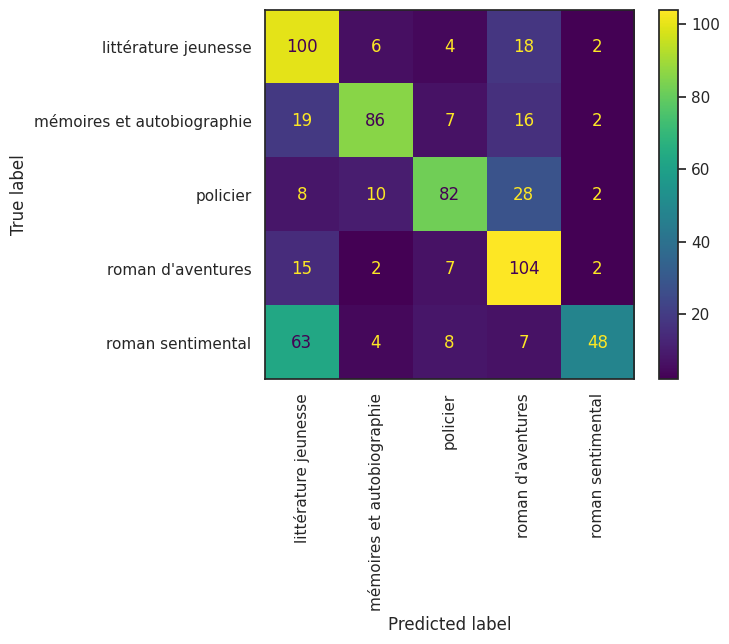

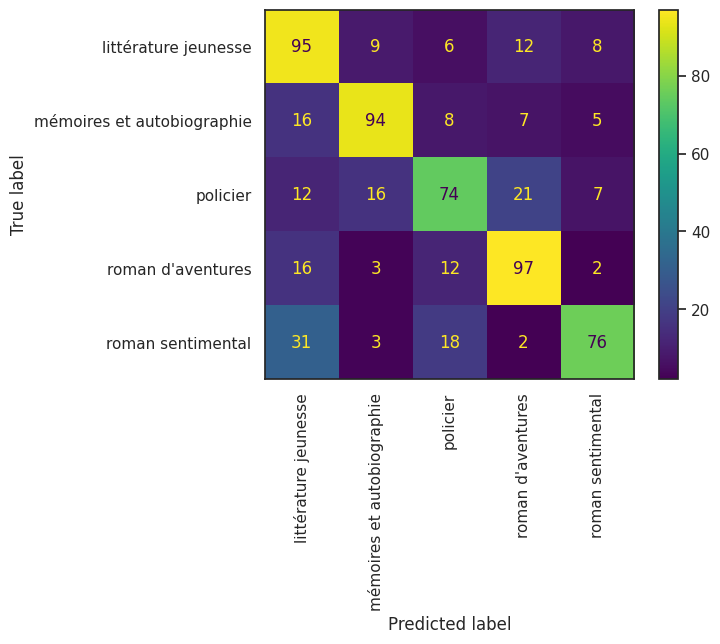

In [164]:
df_TEST_CONCAT = pd.concat([df_LOC, df_FAC, df_GPE, df_VEH, df_TIME], axis=1)
df_TEST_CONCAT_genred = get_df_with_subgenre(df_TEST_CONCAT, df_corpus, genres_ok)
df_TEST_CONCAT_authored = get_df_with_authors(df_TEST_CONCAT_genred)
df_TEST_CONCAT_balanced = balance_dataframe(df_TEST_CONCAT_authored, 'subgenre', 130)
pipe, df_scores, bas = GKF_canonized(df_TEST_CONCAT_balanced)
pipe, df_scores, bas = GKF_canonized(df_TEST_CONCAT_balanced, kernel='linear')

In [41]:
df_LOC_genred = get_df_with_subgenre(df_LOC, df_corpus, genres_ok)
df_VEH_genred = get_df_with_subgenre(df_VEH, df_corpus, genres_ok)
df_FAC_genred = get_df_with_subgenre(df_FAC, df_corpus, genres_ok)
df_GPE_genred = get_df_with_subgenre(df_GPE, df_corpus, genres_ok)
df_TIME_genred = get_df_with_subgenre(df_TIME, df_corpus, genres_ok)
df_ADJ_genred = get_df_with_subgenre(df_ADJ, df_corpus, genres_ok)
df_AGENT_genred = get_df_with_subgenre(df_AGENT, df_corpus, genres_ok)
df_PATIENT_genred = get_df_with_subgenre(df_PATIENT, df_corpus, genres_ok)

In [42]:
df_LOC_authored = get_df_with_authors(df_LOC_genred)
df_VEH_authored = get_df_with_authors(df_VEH_genred)
df_FAC_authored = get_df_with_authors(df_FAC_genred)
df_GPE_authored = get_df_with_authors(df_GPE_genred)
df_TIME_authored = get_df_with_authors(df_TIME_genred)
df_ADJ_authored = get_df_with_authors(df_ADJ_genred)
df_AGENT_authored = get_df_with_authors(df_AGENT_genred)
df_PATIENT_authored = get_df_with_authors(df_PATIENT_genred)

In [43]:
df_LOC_balanced = balance_dataframe(df_LOC_authored, 'subgenre', 130)
df_VEH_balanced = balance_dataframe(df_VEH_authored, 'subgenre', 130)
df_FAC_balanced = balance_dataframe(df_FAC_authored, 'subgenre', 130)
df_GPE_balanced = balance_dataframe(df_GPE_authored, 'subgenre', 130)
df_TIME_balanced = balance_dataframe(df_TIME_authored, 'subgenre', 130)
df_ADJ_balanced = balance_dataframe(df_ADJ_authored, 'subgenre', 130)
df_AGENT_balanced = balance_dataframe(df_AGENT_authored, 'subgenre', 130)
df_PATIENT_balanced = balance_dataframe(df_PATIENT_authored, 'subgenre', 130)

                            precision    recall  f1-score     support
littérature jeunesse         0.330049  0.515385  0.402402  130.000000
mémoires et autobiographie   0.571429  0.461538  0.510638  130.000000
policier                     0.577778  0.400000  0.472727  130.000000
roman d'aventures            0.543478  0.769231  0.636943  130.000000
roman sentimental            0.235294  0.123077  0.161616  130.000000
accuracy                     0.453846  0.453846  0.453846    0.453846
0.45384615384615384
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.330049 & 0.515385 & 0.402402 & 130.000000 \\
mémoires et autobiographie & 0.571429 & 0.461538 & 0.510638 & 130.000000 \\
policier & 0.577778 & 0.400000 & 0.472727 & 130.000000 \\
roman d'aventures & 0.543478 & 0.769231 & 0.636943 & 130.000000 \\
roman sentimental & 0.235294 & 0.123077 & 0.161616 & 130.000000 \\
accuracy & 0.453846 & 0.453846 & 0.453846 & 0.453846 \\
\bottomru

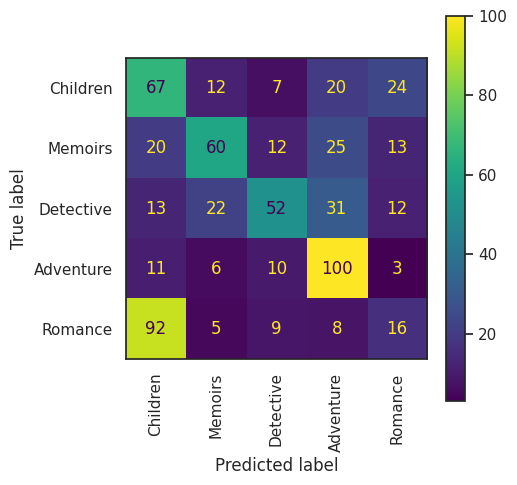

In [44]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_LOC_balanced, 'LOC', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.275449  0.353846  0.309764  130.000000
mémoires et autobiographie   0.463636  0.392308  0.425000  130.000000
policier                     0.579439  0.476923  0.523207  130.000000
roman d'aventures            0.558824  0.730769  0.633333  130.000000
roman sentimental            0.218750  0.161538  0.185841  130.000000
accuracy                     0.423077  0.423077  0.423077    0.423077
0.4230769230769231
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.275449 & 0.353846 & 0.309764 & 130.000000 \\
mémoires et autobiographie & 0.463636 & 0.392308 & 0.425000 & 130.000000 \\
policier & 0.579439 & 0.476923 & 0.523207 & 130.000000 \\
roman d'aventures & 0.558824 & 0.730769 & 0.633333 & 130.000000 \\
roman sentimental & 0.218750 & 0.161538 & 0.185841 & 130.000000 \\
accuracy & 0.423077 & 0.423077 & 0.423077 & 0.423077 \\
\bottomrul

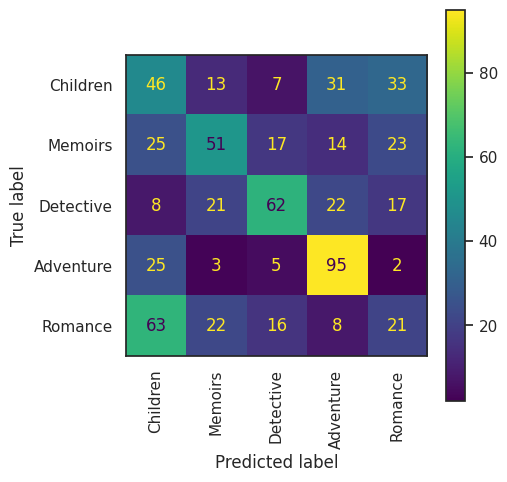

In [45]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_VEH_balanced, 'VEH', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.472222  0.653846  0.548387  130.000000
mémoires et autobiographie   0.600000  0.600000  0.600000  130.000000
policier                     0.682927  0.646154  0.664032  130.000000
roman d'aventures            0.595238  0.769231  0.671141  130.000000
roman sentimental            0.734694  0.276923  0.402235  130.000000
accuracy                     0.589231  0.589231  0.589231    0.589231
0.5892307692307692
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.472222 & 0.653846 & 0.548387 & 130.000000 \\
mémoires et autobiographie & 0.600000 & 0.600000 & 0.600000 & 130.000000 \\
policier & 0.682927 & 0.646154 & 0.664032 & 130.000000 \\
roman d'aventures & 0.595238 & 0.769231 & 0.671141 & 130.000000 \\
roman sentimental & 0.734694 & 0.276923 & 0.402235 & 130.000000 \\
accuracy & 0.589231 & 0.589231 & 0.589231 & 0.589231 \\
\bottomrul

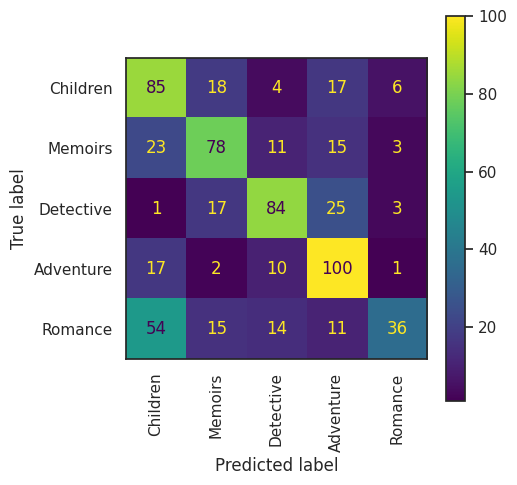

In [46]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_FAC_balanced, 'FAC', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.368932  0.584615  0.452381  130.000000
mémoires et autobiographie   0.566038  0.461538  0.508475  130.000000
policier                     0.562500  0.346154  0.428571  130.000000
roman d'aventures            0.482587  0.746154  0.586103  130.000000
roman sentimental            0.473684  0.207692  0.288770  130.000000
accuracy                     0.469231  0.469231  0.469231    0.469231
0.46923076923076923
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.368932 & 0.584615 & 0.452381 & 130.000000 \\
mémoires et autobiographie & 0.566038 & 0.461538 & 0.508475 & 130.000000 \\
policier & 0.562500 & 0.346154 & 0.428571 & 130.000000 \\
roman d'aventures & 0.482587 & 0.746154 & 0.586103 & 130.000000 \\
roman sentimental & 0.473684 & 0.207692 & 0.288770 & 130.000000 \\
accuracy & 0.469231 & 0.469231 & 0.469231 & 0.469231 \\
\bottomru

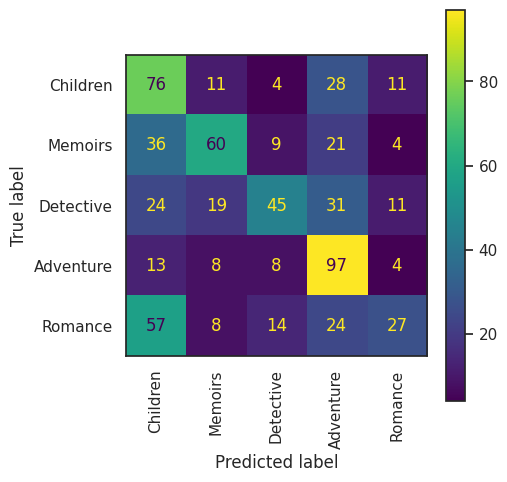

In [47]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_GPE_balanced, 'GPE', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.409756  0.646154  0.501493  130.000000
mémoires et autobiographie   0.659091  0.669231  0.664122  130.000000
policier                     0.487179  0.438462  0.461538  130.000000
roman d'aventures            0.503448  0.561538  0.530909  130.000000
roman sentimental            0.431373  0.169231  0.243094  130.000000
accuracy                     0.496923  0.496923  0.496923    0.496923
0.49692307692307686
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.409756 & 0.646154 & 0.501493 & 130.000000 \\
mémoires et autobiographie & 0.659091 & 0.669231 & 0.664122 & 130.000000 \\
policier & 0.487179 & 0.438462 & 0.461538 & 130.000000 \\
roman d'aventures & 0.503448 & 0.561538 & 0.530909 & 130.000000 \\
roman sentimental & 0.431373 & 0.169231 & 0.243094 & 130.000000 \\
accuracy & 0.496923 & 0.496923 & 0.496923 & 0.496923 \\
\bottomru

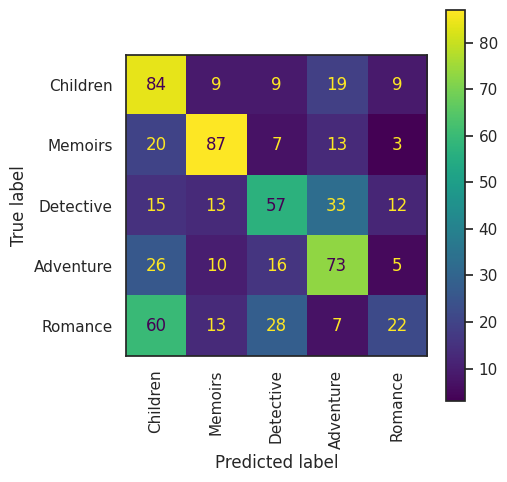

In [48]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_TIME_balanced, 'TIME', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score  support
littérature jeunesse         0.427673  0.523077  0.470588    130.0
mémoires et autobiographie   0.519231  0.623077  0.566434    130.0
policier                     0.522124  0.453846  0.485597    130.0
roman d'aventures            0.541667  0.600000  0.569343    130.0
roman sentimental            0.500000  0.300000  0.375000    130.0
accuracy                     0.500000  0.500000  0.500000      0.5
0.4999999999999999
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.427673 & 0.523077 & 0.470588 & 130.000000 \\
mémoires et autobiographie & 0.519231 & 0.623077 & 0.566434 & 130.000000 \\
policier & 0.522124 & 0.453846 & 0.485597 & 130.000000 \\
roman d'aventures & 0.541667 & 0.600000 & 0.569343 & 130.000000 \\
roman sentimental & 0.500000 & 0.300000 & 0.375000 & 130.000000 \\
accuracy & 0.500000 & 0.500000 & 0.500000 & 0.500000 \\
\bottomrule
\end{tabular}



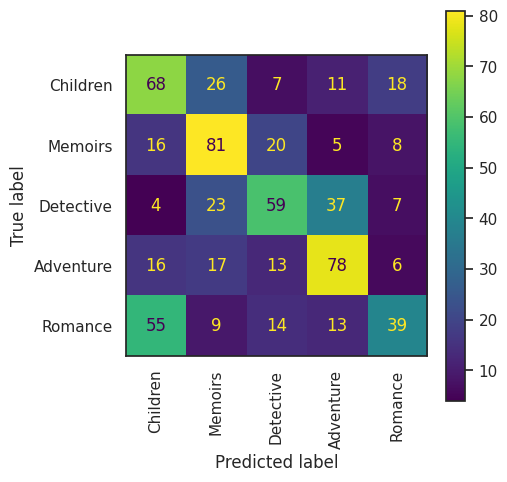

In [49]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_ADJ_balanced, 'ADJ', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score     support
littérature jeunesse         0.533333  0.738462  0.619355  130.000000
mémoires et autobiographie   0.723270  0.884615  0.795848  130.000000
policier                     0.652174  0.461538  0.540541  130.000000
roman d'aventures            0.529762  0.684615  0.597315  130.000000
roman sentimental            0.882353  0.346154  0.497238  130.000000
accuracy                     0.623077  0.623077  0.623077    0.623077
0.6230769230769231
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.533333 & 0.738462 & 0.619355 & 130.000000 \\
mémoires et autobiographie & 0.723270 & 0.884615 & 0.795848 & 130.000000 \\
policier & 0.652174 & 0.461538 & 0.540541 & 130.000000 \\
roman d'aventures & 0.529762 & 0.684615 & 0.597315 & 130.000000 \\
roman sentimental & 0.882353 & 0.346154 & 0.497238 & 130.000000 \\
accuracy & 0.623077 & 0.623077 & 0.623077 & 0.623077 \\
\bottomrul

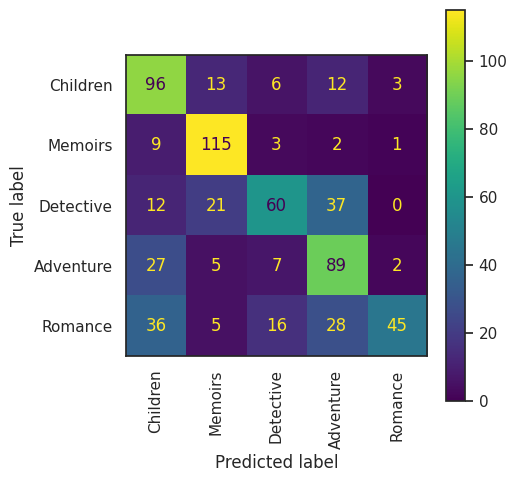

In [50]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_AGENT_balanced, 'AGENT', probas=True)
print(df_scores.to_latex())

                            precision    recall  f1-score  support
littérature jeunesse         0.492958  0.538462  0.514706   130.00
mémoires et autobiographie   0.597826  0.846154  0.700637   130.00
policier                     0.539474  0.315385  0.398058   130.00
roman d'aventures            0.446237  0.638462  0.525316   130.00
roman sentimental            0.548387  0.261538  0.354167   130.00
accuracy                     0.520000  0.520000  0.520000     0.52
0.5199999999999999
\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
littérature jeunesse & 0.492958 & 0.538462 & 0.514706 & 130.000000 \\
mémoires et autobiographie & 0.597826 & 0.846154 & 0.700637 & 130.000000 \\
policier & 0.539474 & 0.315385 & 0.398058 & 130.000000 \\
roman d'aventures & 0.446237 & 0.638462 & 0.525316 & 130.000000 \\
roman sentimental & 0.548387 & 0.261538 & 0.354167 & 130.000000 \\
accuracy & 0.520000 & 0.520000 & 0.520000 & 0.520000 \\
\bottomrule
\end{tabular}



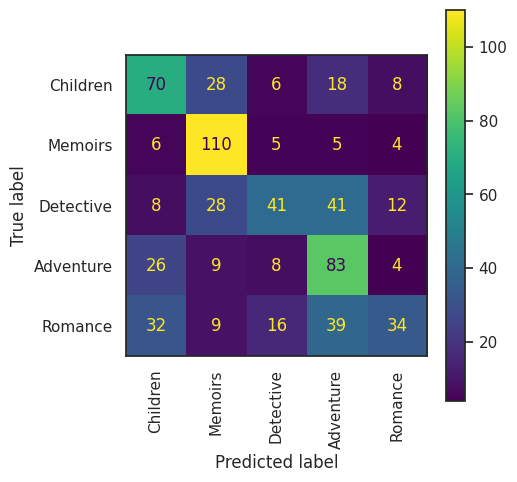

In [51]:
pipe, df_scores, bas, df_probas = GKF_canonized(df_PATIENT_balanced, 'PATIENT', probas=True)
print(df_scores.to_latex())